In [19]:
import pandas as pd
df = pd.read_csv('training_data.txt', delimiter = "\t", header=None, names=["msg"], encoding = 'UTF-8')

In [20]:
df.head()

msg
0               can u do check in for me
1         score ke update nai milre apke
2  i need a hotel near symbiosis college
3  i have trying this app for first time
4                your app have some bugs

['to', 'i', 'me', 'for', 'the', 'in', 'you', 'is', 'my', 'can', 'of', 'want', 'from', 'a', 'at', 'reminder', 'on', 'u', 'match', 'any']


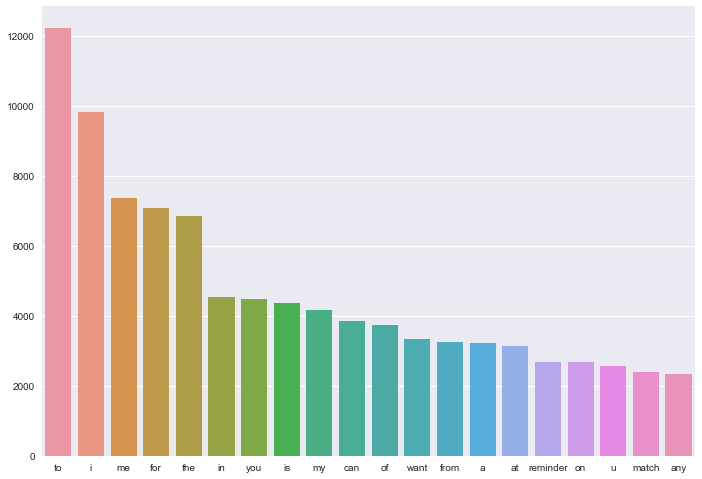

In [156]:
# Creating a list of documents from the complaints column
list_of_docs = df["msg"].tolist()
#print(list_of_docs)
# Implementing the function for all the complaints of list_of_docs
doc_clean1 = [doc.split() for doc in list_of_docs]
doc_clean_list1=[item for sublist in doc_clean1 for item in sublist]
#doc_clean_list.count('score')
import collections
import operator
import seaborn as sns
d1=dict(collections.Counter(doc_clean_list1))
top_20=sorted(d1.items(), key=operator.itemgetter(1), reverse=True)[:20]
    
# Top 20 most occuring words
top_20_words=[i[0] for i in top_20]

top_20_values=[i[1] for i in top_20]

# Display top 20 words
print(top_20_words)

sns.barplot(top_20_words,top_20_values)
sns.set(rc={'figure.figsize':(20,10)})

In [ ]:
import re sentence = 'I need need to learn regex... regex from scratch!'
# remove punctuation 
# the unicode flag makes it work for more letter types (non-ascii) 
#no_punc = re.sub(r'[^\w\s]', '', sentence, re.UNICODE) 
#print('No punctuation:', no_punc) 
# remove duplicates 
re_output = re.sub(r'\b(\w+)( \1\b)+', r'\1', no_punc) 
print('No duplicates:', re_output)

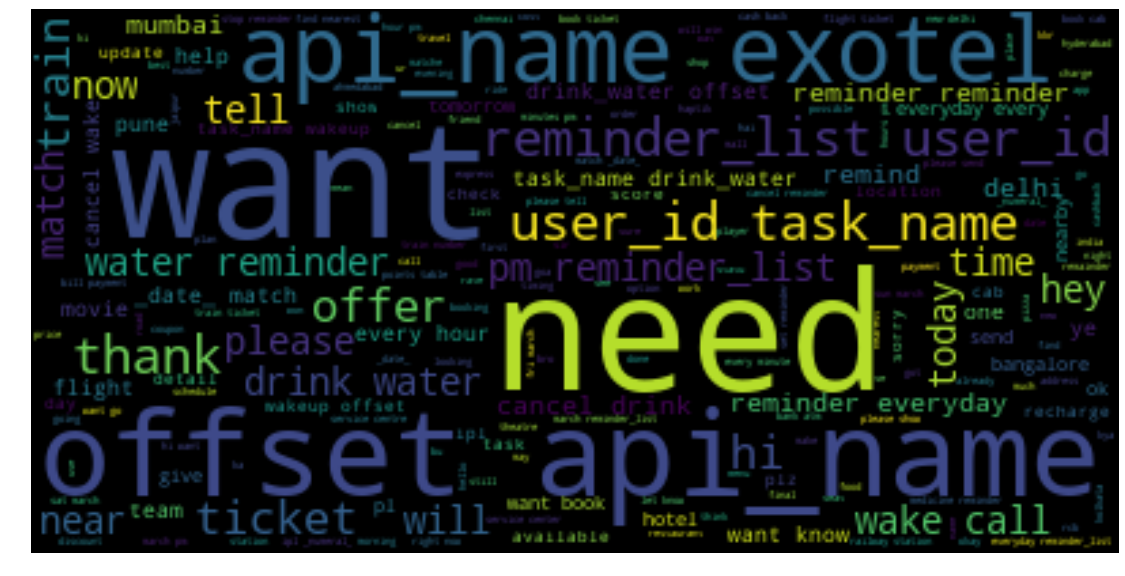

In [157]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
textall1 = " ".join(doc_clean_list1)
#print(textall)
wordcloud1 = WordCloud(max_font_size = 60).generate(textall1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [253]:
import os
import numpy as np
import warnings
from nltk.corpus import stopwords
#import stop_words
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from pprint import pprint
import re
from autocorrect import spell
from nltk.stem.porter import PorterStemmer

warnings.filterwarnings("ignore")
stop = stopwords.words('english')
stop.extend(['{','}','0','1','2','3','4','5','6','7','8','9','am','pm','would','like','get','today','list','need','offset','time','water','drink','pls','id','user','task','reminderlist','drinkwater','reminder list','drink water','apiname','userid','taskname', 'u','user_id:','task_name:', 'api_name','exotel', 'api_name:','product_id', 'api','name',"n't", 'thanks','thank','hey','please','hello','user_id','userid', 'plz','a9c0', '676951', 'hi', '727893', '55616','want','need','ll','know','go','tell','check','good','give','go','still','will','help','pl','now','looking','hai','find', 'let','ye','sorry','okay','ok'])
print(stop)
emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)
exclude = set(string.punctuation)

lemma = WordNetLemmatizer()
p_stemmer = PorterStemmer()
# Function to lemmatize and remove the stopwords
def clean(doc):
    punc_free = "".join(ch for ch in doc if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.lower().split() if i not in stop])
    emoji_free = emoji_pattern.sub(r'', stop_free)  
    
    normalized = " ".join(lemma.lemmatize(word) for word in emoji_free.split())
    re_output =  re.sub(r'\b(\w+)( \1\b)+', r'\1', normalized)
    #spell(word)
    

    return re_output


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

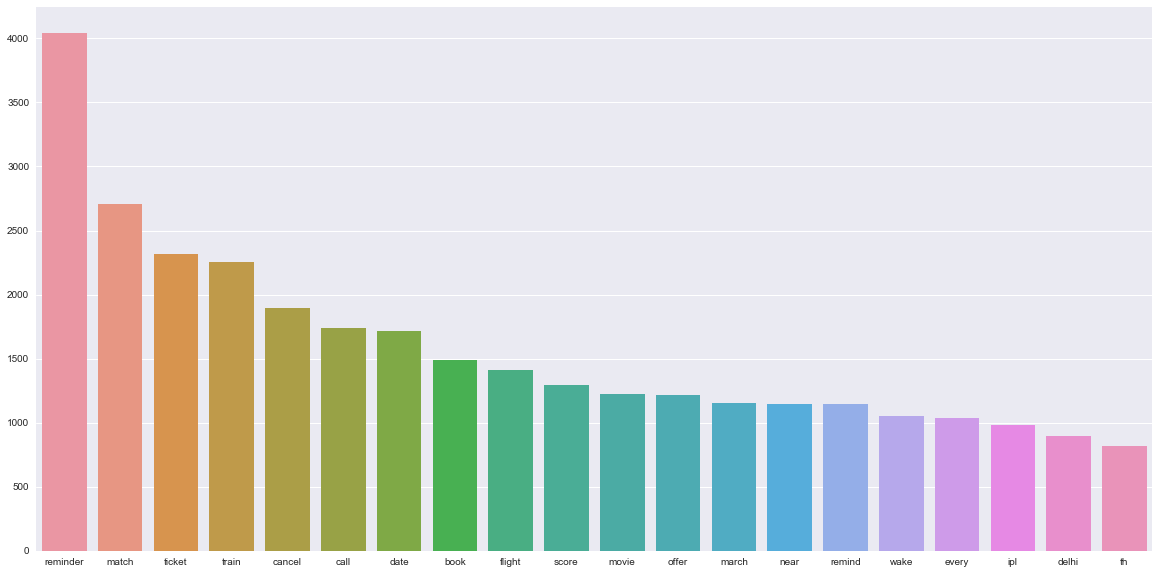

In [254]:
# Creating a list of documents from the complaints column
df["msg"]=df["msg"].apply(lambda x: re.sub('[^a-zA-Z]', ' ',x))


correctwords=[]
def spellingcorrect(a):
    for sent in words:
        for word in sent:
            print(spell(word))
            
list_of_docs = df["msg"].tolist()

# Implementing the function for all the complaints of list_of_docs
doc_clean2 = [clean(doc).split() for doc in list_of_docs]
doc_clean_list2=[item for sublist in doc_clean2 for item in sublist]
doc_clean_list2.count('score')
import collections
#print(collections.Counter(doc_clean_list))
d2=dict(collections.Counter(doc_clean_list2))
top_20_new=sorted(d2.items(), key=operator.itemgetter(1), reverse=True)[:20]
    
# Top 20 most occuring words
top_20_new_words=[i[0] for i in top_20_new]

top_20_new_values=[i[1] for i in top_20_new]

# Display top 20 words
#print(top_20_words)

sns.barplot(top_20_new_words,top_20_new_values)
sns.set(rc={'figure.figsize':(20,10)})

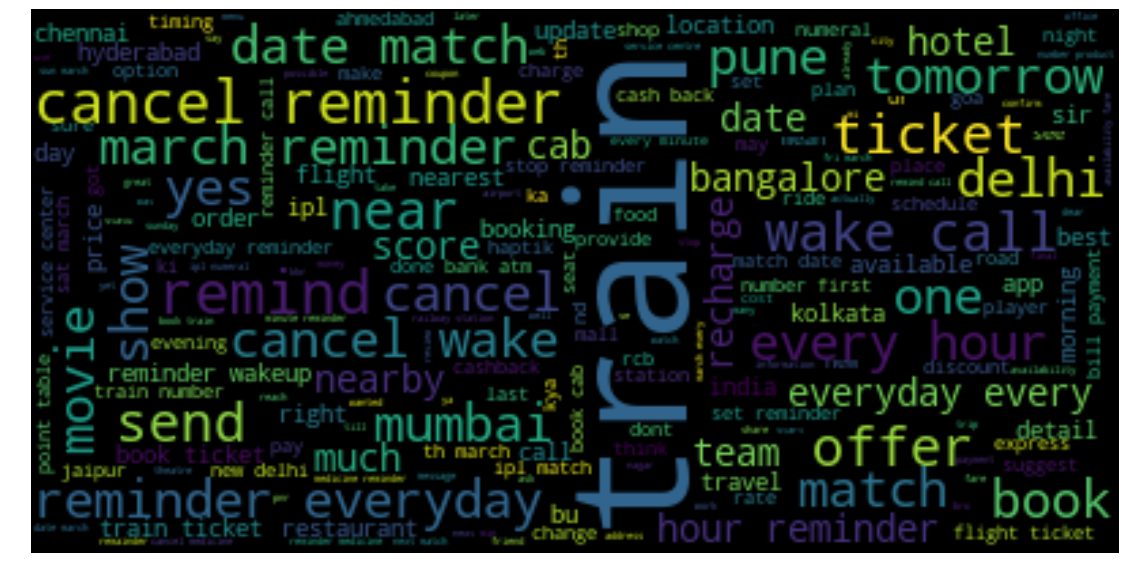

In [255]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
textall2 = " ".join(doc_clean_list2)
#print(textall)
wordcloud = WordCloud(max_font_size = 60).generate(textall2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [215]:
sorted(d2.items(), key=operator.itemgetter(1), reverse=True)

[('reminder', 4041),
 ('match', 2708),
 ('ticket', 2320),
 ('train', 2256),
 ('cancel', 1898),
 ('call', 1736),
 ('date', 1714),
 ('book', 1488),
 ('flight', 1412),
 ('score', 1292),
 ('movie', 1220),
 ('offer', 1219),
 ('march', 1153),
 ('near', 1149),
 ('remind', 1147),
 ('wake', 1052),
 ('every', 1037),
 ('ipl', 981),
 ('delhi', 898),
 ('th', 821),
 ('update', 812),
 ('send', 810),
 ('mumbai', 809),
 ('numeral', 763),
 ('everyday', 741),
 ('cab', 728),
 ('show', 712),
 ('recharge', 706),
 ('one', 690),
 ('r', 688),
 ('service', 681),
 ('bus', 680),
 ('bank', 677),
 ('hour', 665),
 ('number', 641),
 ('team', 637),
 ('hotel', 614),
 ('nearby', 611),
 ('day', 562),
 ('available', 552),
 ('set', 539),
 ('atm', 531),
 ('tomorrow', 530),
 ('order', 522),
 ('pune', 505),
 ('win', 497),
 ('location', 494),
 ('india', 493),
 ('booking', 492),
 ('nearest', 491),
 ('bill', 491),
 ('detail', 478),
 ('yes', 475),
 ('restaurant', 468),
 ('morning', 467),
 ('stop', 465),
 ('much', 453),
 ('bangalo

In [167]:
print(doc_clean_list2)

['score', 'ke', 'update', 'nai', 'milre', 'apke', 'hotel', 'near', 'symbiosis', 'college', 'trying', 'app', 'first', 'app', 'bug', 'nearest', 'atm', 'u', 'trip', 'nearest', 'rapair', 'service', 'car', 'invalid', 'say', 'date', 'match', 'update', 'im', 'interested', 'watching', 'running', 'shaadi', 'movienamerunning', 'shaaditask', 'train', 'hosur', 'wake', 'wish', 'nearest', 'pizza', 'location', 'malad', 'goregaon', 'etc', 'delete', 'item', 'r', 'batsman', 'evening', 'mumbai', 'darshan', 'punjab', 'bank', 'atm', 'ping', 'numeral', 'min', 'whenever', 'wan', 'na', 'score', 'detail', 'bus', 'night', 'ahmadabad', 'bikaner', 'volvo', 'sleeper', 'gionee', 'service', 'center', 'jaipur', 'dont', 'book', 'got', 'cheaper', 'flight', 'make', 'trip', 'kuch', 'puch', 'sakata', 'hu', 'stop', 'reminding', 'yamans3', 'etc', 'cold', 'drink', 'offer', 'large', 'bottle', 'tomorrow', 'ask', 'someone', 'call', 'manish', 's', 'milling', 'tomorrow', '11am', 'morning', 'cab', 'detail', 'immediately', 'stilll'

In [221]:
from langdetect import detect_langs

def englishOrHindi(string):
    res = detect_langs(string)
    for item in res:
        if item.lang == "hi" or item.lang == "en":
            return item.lang
    return None
print(doc_clean_list[52412])
print(englishOrHindi(doc_clean_list[52412]))

driver
None


In [ ]:
from nltk.tag import tnt
from nltk.corpus import indian
import nltk
def hindi_model():
train_data = indian.tagged_sents('hindi.pos')
tnt_pos_tagger = tnt.TnT()
tnt_pos_tagger.train(train_data)
return tnt_pos_tagger
#text = "इराक के विदेश मंत्री ने अमरीका के उस प्रस्ताव का मजाक उड़ाया है , जिसमें अमरीका ने संयुक्त राष्ट्र के प्रतिबंधों को इराकी नागरिकों के लिए कम हानिकारक बनाने के लिए कहा है ।"
model = hindi_model()
new_tagged = (model.tag(nltk.word_tokenize(text)))
print(new_tagged)
with open("result/output.txt","a") as output_file:
output_file.write("\n[INPUT]\n")
output_file.write(text)
output_file.write("\n[OUTPUT]\n")
output_file.write(str(new_tagged))

In [165]:
from nltk.tag import tnt
from nltk.corpus import indian
import nltk
def hindi_model():
    train_data = indian.tagged_sents('hindi.pos')
    tnt_pos_tagger = tnt.TnT()
    tnt_pos_tagger.train(train_data)
    return tnt_pos_tagger

text = "इराक के विदेश मंत्री ने अमरीका के उस प्रस्ताव का मजाक उड़ाया है , जिसमें अमरीका ने संयुक्त राष्ट्र के प्रतिबंधों को इराकी नागरिकों के लिए कम हानिकारक बनाने के लिए कहा है ।"
model = hindi_model()
new_tagged = (model.tag(nltk.word_tokenize(text)))
print(new_tagged)
with open("output.txt","a") as output_file:
    output_file.write("\n[INPUT]\n")
    output_file.write(text)
    output_file.write("\n[OUTPUT]\n")
    output_file.write(str(new_tagged))

[('इराक', 'NNP'), ('के', 'PREP'), ('विदेश', 'NNC'), ('मंत्री', 'NN'), ('ने', 'PREP'), ('अमरीका', 'NNP'), ('के', 'PREP'), ('उस', 'PRP'), ('प्रस्ताव', 'NN'), ('का', 'PREP'), ('मजाक', 'NVB'), ('उड़ाया', 'VFM'), ('है', 'VAUX'), (',', 'PUNC'), ('जिसमें', 'PRP'), ('अमरीका', 'NNP'), ('ने', 'PREP'), ('संयुक्त', 'NNC'), ('राष्ट्र', 'NN'), ('के', 'PREP'), ('प्रतिबंधों', 'NN'), ('को', 'PREP'), ('इराकी', 'JJ'), ('नागरिकों', 'NN'), ('के', 'PREP'), ('लिए', 'PREP'), ('कम', 'INTF'), ('हानिकारक', 'JJ'), ('बनाने', 'VNN'), ('के', 'PREP'), ('लिए', 'PREP'), ('कहा', 'VFM'), ('है', 'VAUX'), ('।', 'PUNC')]


UnicodeEncodeError: 'charmap' codec can't encode characters in position 0-3: character maps to <undefined>

In [235]:
import langid
langid.set_languages(['hi', 'en'])  # ISO 639-1 codes
l1=[]
for i in range(0,len(doc_clean_list)):
    print(doc_clean_list[i])
    lang, score = langid.classify(doc_clean_list[i]) 
    l1.append(lang)
print(l)

score
ke
update
nai
milre
apke
hotel
near
symbiosis
college
trying
app
first
time
app
bug
nearest
atm
u
trip
nearest
rapair
service
car
invalid
say
date
match
update
im
interested
watching
running
shaadi
movienamerunning
shaaditask
train
hosur
wake
wish
nearest
pizza
location
like
malad
goregaon
etc
delete
item
r
batsman
evening
mumbai
darshan
punjab
bank
atm
ping
numeral
min
whenever
wan
na
score
detail
bus
today
night
ahmadabad
bikaner
volvo
sleeper
gionee
service
center
jaipur
dont
book
got
cheaper
flight
make
trip
kuch
puch
sakata
hu
stop
reminding
yamans3
etc
cold
drink
offer
large
bottle
tomorrow
ask
someone
call
manish
s
milling
tomorrow
11am
morning
cab
detail
immediately
stilll
recieved
recgarge
subway
near
location
virat
kohli
playing
planning
honeymoon
month
april
3rd
india
suggest
upat
diye
sentence
ko
mujhe
english
mai
transfer
kar
kai
dijiye
massage
spa
nhi
aunty
refund
shall
granted
confirmed
ticket
four
hour
scheduled
departure
train
bangalore
mumbai
deepti
availability

reliance
store
mall
road
kanpur
great
great
lot
12279
current
score
rcb
v
ddr
hve
train
today
srikakulam
theatre
indian
coffee
house
would
like
cancel
meet
reliance
jio
recharge
reminder
fri
31
march
1200
pm
707830
1091598
meetsomeone
offset
0
get
coupo
would
like
cancel
drink
water
reminder
reminder
everyday
every
2
hour
1000
800
pm
698060
1980686
offset
0
new
tamil
movie
ohh
gl
offer
haptik
electricity
bill
payment
broadband
sarvise
updated
date
match
e
tuesday
gujarat
v
delhi
restaurant
near
vandaloor
zoo
chennai
book
taxi
location
nasik
road
railway
stationola
cab
movie
sant
mical
school
kha
pe
h
btaiye
na
oh
yeah
helped
best
pizza
place
sector
35
chd
paid
already
deal
im
nearest
atmrepeatbanner
book
movie
ticket
remind
one
appointment
fuck
date
remind
meeting
30
min
prior
meeting
900
1100
pm
iam
karnataka
whr
sir
vahot
jada
cancel
wake
call
score
ohh
sry
arrival
time
recharge
jio
av
pina
1955
pe
axis
bank
atm
reschedule
water
reminder
6am
10
pm
everyday
frequency
every
30
min
amba

done
fashion
street
pay
hathaway
broadband
bill
meant
dont
alarm
get
could
look
flight
ticket
mangaluru
mumbai
nairobi
13
dec
return
11th
jan
schedule
date
march
3
2017
time
8
15
pm
flight
fare
mumbai
match
ticket
ipl
match
srh
v
rcb
drink
water
wake
chicken
fried
rice
offer
recharge
govind
govind
k
problem
ill
come
na
phone
postpaid
nearby
atm
united
bank
india
chrck
flight
new
delhi
mumbai
14th
august
hotel
team
haptik
ive
quite
responsive
day
appreciate
ur
timly
reminder
love
app
remind
7
pm
daily
number
think
sorryy
didnt
understand
win
game
send
schedule
cub
atm
near
chennai
one
dont
reminder
onwards
joke
samrat
electrician
group
insurance
date
konsi
team
ki
match
cheap
one
kfc
dont
online
order
actual
data
connection
received
notification
opened
haptik
necessary
get
notification
open
haptik
app
would
like
cancel
meet
someone
reminder
fri
03
march
0726
689318
1978684
meetsomeone
offset
0
25
member
call
pls
hotel
ub
city
dear
maalvika
whether
payment
would
done
bill
fair
destinatio

contact
information
nearest
domino
detail
mobile
service
center
wake
930
tomorrow
water
life
gym
nearby
rcb
dd
booked
train
12902
chart
prepared
seat
conform
refund
also
come
pls
refund
amount
single
nothing
remind
medicine
2230
hr
amazing
score
whats
time
cashback
offer
im
asking
near
show
room
r
saying
long
distance
whay
time
maych
date
n
team
would
like
cancel
drink
water
reminder
reminder
everyday
every
30
minute
1000
800
pm
720916
1985281
offset
0
ravikiran
mean
key
maker
latha
cinema
godan
exp
moment
cancel
wake
call
forgot
date
match
timing
today
meeting
kochuveli
express
27
sept
morning
730
745
alarm
match
stediaum
score
card
date
match
take
medican
well
mention
list
set
reminder
well
medisol
menu
detail
central
jail
restaurant
jp
nagar
745
tomorrow
bot
getting
notification
bank
baroda
bro
power
backup
shihm
3
two
rooms2
person
room
dn
gim
score
remind
every
day
medicine
trying
remind
take
sandal
today
2200
hr
itis
done
kannada
movie
released
presently
wy
ro
water
filter
update

mi
make
playoff
wakeup
cal
guide
location
french
tailor
new
market
shilpa
talked
time
back
make
one
reminder
visiting
bank
opening
account
today
one
hour
uhohió
india
match
car
mechanic
said
fine
remind
calling
dad
train
faridabad
bikaner
train
timmings
traveller
gujarat
mumbai
cant
take
print
best
hotel
kolhapur
offer
airtel
billing
called
would
like
cancel
drink
water
reminder
reminder
thu
02
march
every
1
hour
1000
800
pm
520506520507520508520509520510520511520512520513520514
1867619
offset
0
bus
booking
option
mrp
corona
beer
fl
shop
wat
put
daily
reminder
medicine
union
bank
india
atm
home
delivery
one
day
delivery
medicine
super
eight
time
sakshi
hw
r
take
ur
opinion
pune
team
ipl
think
dhoni
working
best
coming
flight
landed
kotak
mahindra
bank
branch
near
kolkata
st
rampur
hat
confirm
sir
maharshtra
exp
arrive
jalgaon
right
time
12301899
would
like
cancel
drink
water
reminder
reminder
everyday
every
1
hour
1000
800
pm
621737
1042305
offset
0
indian
bank
atm
near
remind
12th
mar

confirm
payment
success
v
pakisthan
custom
reminder
crease
right
drinking
water
must
ankita
top
numeral
batsman
score
highest
run
ipl
ipl
ki
point
table
bhajna
15th
train
available
egmore
pugalur
ho
one
thing
kon
hua
h
remind
attend
wedding
reception
shankar
son
11102016
7
pm
jhelam
express
ki
flight
rate
pune
nagpur
get
complimentary
food
corporate
ticket
date
rcb
match
would
like
cancel
wake
call
everyday
0510
469641
1865279
wakeup
offset
0
debit
card
number
book
ticket
bus
salem
poonamella
ajmer
tumkur
bangalore
information
satisfactory
reminder
nothing
right
around
8
send
score
every
half
hour
sab
ko
saath
milega
na
seat
western
union
nearby
hii
sakshi
bus
timing
trivandrum
today
score
ongoing
match
payment
gateway
pay
mobile
bill
whose
match
date
deal
lunch
today
sbi
beer
bar
movie
cinema
ludhiana
rampurhat
120317
hyderabad
mumbai
train
list
actual
price
cashbook
n
flight
near
neelam
chock
would
like
cancel
drink
water
reminder
reminder
everyday
every
30
minute
1000
800
pm
705660


pls
ac
service
would
like
cancel
drink
water
reminder
reminder
everyday
every
1
hour
1000
800
pm
710460
1983385
offset
0
nt
update
live
score
review
train
12841
coromandal
express
leaving
howrah
stn
santragachi
station
journey
tkt
120916
pls
train
rechedued
pizza
hut
offer
courier
service
near
travel
pune
gorakhpur
hdfc
make
trip
7
day
chandigarh
around
300
km
cupboard
3rd
march
230
pm
plumber
urgent
hotel
tomm
1
st
day
1
show
cubic
mall
chembur
6
ticket
much
would
cost
tellme
win
home
delivery
available
location
payment
d2h
recharge
offer
ther
ccd
gopalan
innovation
mall
dont
irritate
aap
rat
ko
sote
nhi
kya
mam
share
point
table
offer
electricity
bill
payment
reminder
call
sonisaheb
4th
march
400
pm
also
another
reminder
face
wash
nail
rubbing
exercise
10
1145
pm
everyday
would
like
cancel
wake
call
wed
01
march
0430
pm
604103
1413102
wakeup
offset
0
could
hookah
parlour
near
indrayini
express
stop
water
reminder
computer
call
whats
best
vodafone
prepaid
plan
food
delivery
alibhaba
g

bike
accessory
shop
numeral
ticket
available
numeral
march
wake
call
9
im
interested
watching
wolverine
3
logan
movienamewolverine
3
logantask
far
zorabian
chicken
sv
road
santa
cruz
frm
santa
cruz
station
second
match
gangstar
ohu
said
discountokwhat
food
combo
offer
one
ticket
mayur
ac
service
transfer
home
service
platform
yuvraj
gon
na
play
date
kuch
yojna
hoti
aurngabad
nanded
last
air
tkt
sent
ccudelhi
haptik
goibibo
united
bank
india
atm
call
remainder
remind
aimcat
test
5th
september
update
pay
card
possible
h
date
march
5
2017
time
9
40
pm
take
laptop
get
ac
service
guy
23
rd
april
return
30
april
numeral
day
match
schedule
yeah
client
booked
flight
ticket
detail
flight
new
delhi
bhubaneswar
thought
reach
destination
200
r
shilpa
garu
cancel
reminder
water
gd
mg
carpenter
sexy
book
haptik
wallet
medplus
ankita
location
d28
sector
15
noida
would
like
cancel
medicine
reminder
everyday
1109
pm
607936
1941763
medicine
offset
0
offer
mobile
bill
pay
send
ipl
point
table
lowest
pric

2556
933
410
wake
15
min
set
reminder
every
hour
didnt
received
actually
table
2
chair
2
stool
fine
review
banjo
match
time
bje
se
start
kariya
dubara
scorecard
date
match
match
schedule
book
cab
tomorrow
st
john
evelist
high
school
movie
16787
train
sheet
availablity
shruti
2
pm
oh
heeello
msankita
im
correct
remind
every
one
hour
thk
morning
reminder
cancelled
getting
reminder
bhattwadi
showing
team
player
owner
u
wat
time
india
west
indie
match
start
date
option
margarita
pizza
theater
e
square
process
46
payment
mode
sent
bymistake
score
india
pakistan
match
live
update
match
start
get
list
orange
purple
cap
schedule
one
reminder
time
expected
start
12236
20
june
call
thane
parlivaijnath
train
11011
doubt
got
seat
available
class
keep
updating
promise
send
update
score
many
spent
ride
1
hour
wish
order
cake
online
get
delivered
gaya
bihar
option
set
bund
mrvao
frrr
yaa
sure
contractor
landscaping
work
vipul
panipat
move
kon
shi
lgi
huai
h
n
provide
update
match
explored
train
n
fli

kr
road
open
specifically
dr
swaminath
available
today
atvwhat
time
unian
yes
n
fail
keep
updated
planning
standard
chartered
bank
branch
reshma
yeah
offer
movie
ticket
contact
someone
else
print
alright
coupon
code
available
recharge
d2h
service
mobile
recharge
match
wankhede
cab
booked
directly
water
reminder
cancel
boxing
class
nearby
reminding
already
sent
pic
bill
wardha
junction
shegaon
mysore
one
day
tour
package
gst
increase
train
ticket
available
mumbai
reach
coming
saturday
afternoon
ticket
booking
chinese
restaurant
kurla
stop
match
update
wht
think
team
win
remind
movie
sunday
evening
movie
time
somebody
else
wake
8
could
scheduled
call
number
wake
r
honeymoon
travel
package
february
2017
give
allopathic
suggest
flight
bangalore
mumbai
fastest
option
delhi
ambala
cantt
get
ticket
ipl
numeral
banglore
fast
score
every
numeral
over
uptill
gt
amount
computer
engineer
would
like
cancel
meet
jegan
sir
reminder
sat
04
march
0800
pm
692623
1965096
meetsomeone
offset
0
btw
machiato

union
bus
shd
exact
address
yes
deepesh
india
stage
word
wanted
pegasusmanas
flight
manas
pegasus
new
delhi
bishkek
fru
flight
cost
dubai
hyderabad
16th
march
2017
te
whats
timing
panchavati
train
dadar
evening
place
delivering
sugar
free
sweet
dessert
thanku
vipul
hii
nalini
stop
reminder
done
mistake
come
back
needed
daniel
cancel
glad
could
share
info
related
ipl
way
medicine
reminder
everyday
rate
cab
babatpur
airport
varanasi
ipl
tim
detal
judicial
layout
call
940
today
south
indian
food
delivery
wanna
travel
mumbai
camando
2
movie
timing
mode
travel
delhi
spiti
valley
book
cab
yes
hydrabad
team
ipl
numeral
kitne
khele
match
kaha
pe
khele
toss
match
kon
jita
h
set
reminder
hr
meeting
thursday
320pm
time
match
strts
tmrw
dont
train
number
im
searching
rajadhani
score
date
game
12301899
current
reminder
detail
pls
set
everyday
thats
read
query
2
glass
water
may
current
status
telangana
express
evening
sagar
ticket
4
adult
3rd
ac
book
hotel
puri
flight
national
international
ola
n
ub

idea
night
pack
net
motorolas
service
center
frm
coimbatore
mumbai
morning
today
train
available
time
match
must
three
tkts
245
rbl
haptik
wallet
cash
valid
month
suppose
gd
ngt
cant
see
wallet
balance
250
r
player
score
rcb
get
train
schedule
atm
upcoming
reminder
book
mayfair
hideaway
r
computer
system
show
snap
shot
cinema
chutiya
ronak
get
pizza
finding
restaurant
waffle
beauty
beast
coming
3d
kolkata
r
arranging
cab
sv
koaa
train
availiblity
1411
bangkok
phi
phi
n
krabi
delhi
v
sunrisers
vanisha
score
time
march
start
wait
ther
ill
wake
0630
get
discount
dont
delivery
option
location
rushing
2
ofis
diplomatic
answer
dude
nno
issue
ndhoni
magician
nlet
see
yes
update
score
match
start
cab
offer
jaipur
buy
travel
packagetask
axis
bank
atm
sure
lot
take
care
alarm
say
morning
alarm
evening
next
match
pune
think
win
ipl
chicken
recharge
done
ter
provide
latest
point
table
match
wi
sa
ssin
train
reach
secunderabad
type
bus
delux
ac
normal
would
next
weeek
done
mobile
recharge
haptik
of

score
match
update
ill
try
later
fine
great
work
offer
dth
lemme
happens
schedule
pmpl
bus
chakan
phulgaon
search
nearby
petrol
pump
bom
goi
indigo
6e981
1535
hr
mon
20
mar
add
muje
1
baat
smjhti
nhi
aap
log
gud
morning
gud
night
stamen
kyu
waste
krte
book
ticket
yaa
fast
2
adult
would
like
cancel
medicine
reminder
everyday
1156
pm
644508
1966280
medicine
offset
0
remind
sign
acquitance
register
920
tomorrow
b
w
match
goin
right
booking
ticket
offer
call
murthy
kollapudi
top
14
retention
got
food
150
26a
ranvir
27a
waris
would
like
cancel
drink
water
reminder
reminder
everyday
every
2
hour
1000
800
pm
661091
1689770
offset
0
anywhere
wake
service
ossam
send
send
6
seater
elvwhical
soon
possible
important
account
holder
central
bank
central
bank
atm
cancel
reminder
drink
water
availability
fare
sleeper
sl
train
number
12391productid12391lkondlsapinametrainsapi
book
rly
tkt
would
like
cancel
todo
open
crownit
app
fri
24
march
0257
pm
604655
1699274
todo
offset
0
restaurant
reservation
of

birthday
offset
0
last
score
ireland
dublin
package
available
via
haptik
remind
call
avinash
credit
report
11
tomorrow
wake
30
min
change
payment
mode
yes
cool
let
hope
work
first
time
movie
ticket
cancel
reminder
havent
drunk
water
time
understand
one
tolerates
abusive
language
last
recharge
succesful
cng
pump
starting
every
two
hour
think
gon
na
win
restaurant
mira
road
share
score
india
australia
two
room
confirm
detail
train
numeral
r
hoi
reliance
digital
express
store
near
artificial
intelligence
robot
dear
haptik
kya
chiz
would
500
book
manish
assistance
managed
radio
canthanks
accept
payment
train
flight
ticket
jolly
llb2
planning
stay
3
night
goa
liberty
cinema
detail
team
ipl
cup
order
food
train
suryanagri
express
jodhpur
bandra
date
journey
17916
cheapest
flight
tomorrow
delhi
kolkata
shweta
send
como
best
data
plan
archana
13237date28022017
patna
kota
booking
bus
suggest
near
canara
bank
location
bus
orange
amd
purple
cap
guwhatit
se
channai
cantrail
tak
train
kab
konsa
dat

dont
water
reminder
round
flat
rent
near
kakadev
yeah
app
checking
337
nd
feeling
sleepy
destination
kasauli
train
go
whats
flight
charge
ahmedabad
p
getting
entered
mistake
aya
offer
haptik
recharge
kalka
barmer
train
ki
timing
kya
chak
already
positive
feed
back
im
interested
watching
john
wick
2
movienamejohn
wick
2task
cheapest
flight
add
shop
detail
database
best
option
diwali
vacation
andheri
reshma
abhi
kitne
reminder
baaki
mere
ispe
save100
cc
taken
discountpl
menu
faisal
kawaab
company
tikona
park
happened
refund
bank
human
operating
mohit
named
ai
option
dont
drive
much
nice
name
remind
make
tea
505
pm
today
make
payment
mt
postpaid
dongle
haptik
restaurant
around
edit
detail
reminder
set
stop
reminder
hv
set
recharge
coupon
available
darling
whts
status
match
quarter
final
static
fr
ticket
discount
switch
alarm
3
marcch
rps
win
recent
match
seecheck
ir
first
msg
sent
total
6
pending
pasks
pls
today
releasing
noy
yaar
busy
reply
ur
awesome
5758
train
kakinada
thirupathi
pa
pa

order
something
packer
mover
cancel
ride
bye
eligible
75
cb
4th
ride
super
pranay
update
wid
today
match
schedule
set
reminder
130
pm
get
watch
repaired
tomorrow
losing
badly
sahibgunj
mistak
reminder
har
score
update
kro
show
hotel
ticket
price
one
senior
male
one
adult
ladyfare
also
vehicle
two
wheeler
rent
destination
noida
sector
18
current
position
ipl
team
send
pizza
availability
seat
apsrtc
super
luxury
bussesto
travel
hyderabad
nandyal
4th
september
hiii
prooja
garu
order
breakfast
could
sbi
branch
around
location
availability
fare
sleeper
sl
train
number
12903productid12903nzmasrapinametrainsapi
package
ujjain
tow
wheeler
water
service
would
like
cancel
medicine
reminder
everyday
0830
714756
1955825
medicine
offset
0
numeral
team
reached
semi
final
meri
english
khrab
waise
mai
filal
kahi
ja
nhi
rhaagr
jrurt
pdi
pkka
btauga
ohk
mobile
shop
travel
khana
app
train
frst
meal
free
traveller
restaurant
suggest
five
star
lpg
gas
ki
jankari
bta
skte
regular
team
would
like
cancel
medi

बहोत
मदत
की
उसके
लिए
धनयवाद
सय
web
wht
abt
wht
think
win
match
y
book
nd
2
ticket
look
timing
lakshme
theater
taverkere
thats
maximum
australia
tour
package
15
minute
reach
dadar
call
kalki
resort
goa
ask
pick
drop
service
provided
couple
allowed
actually
left
side
window
seat
get
taxi
dehradun
airport
mussorie
leading
run
scorer
last
match
idk
candel
light
dinner
could
price
mandi
spice
bawarchi
hotel
babanagar
main
road
next
match
india
whome
received
amount
cancelled
train
ticket
hii
sexy
thought
cashback
offer
thats
book
ticket
put
text
pls
book
cab
basis
earlier
confirmation
asking
whats
new
ur
new
apps
update
cab
birthday
cake
home
delivery
7th
march
delivery
time
anytime
day
flavour
500
gm
get
cheapest
price
available
home
delivery
message
cake
happy
birthday
summaiyya
address
would
summaiyya
momin
ansari
sabiha
jaffar
manzil
wing1momin
baugh
dargha
road
bhiwandi421302
maharashtra
contact
91
77570
58162
sender
mohammed
abdul
malik
aurangabad
ms431001
bar
restaurant
near
team
squ

taxi
lonavala
web
checkin
would
like
cancel
wake
call
fri
03
march
0830
688689
1939494
wakeup
offset
0
federal
bank
atm
actually
wake
call
date
march
4
2017
time
7
55
whether
ola
uber
work
agra
train
early
hour
day
cab
come
tym
ryt
shld
schedule
team
playing
date
destination
place
available
hyderabad
chennai
final
score
card
pune
batting
share
route
train
12041
guitar
class
wats
score
wrt
broblem
drink
pnr8412699551train11017doj110317sllttvmdep1205
prakash
ss3
56
fare575sc00
pg
in
3
ticket
even
bus
flight
ticket
mumbai
jaipur
samgmeshwer
goa
much
km
giving
detail
train
coming
bangalore
tomorrow
date
match
cricket
update
thats
shruti
3032017
stop
wake
call
reminder
hamdabad
wow
book
3dates
end
movie
fix
air
conditioner
playes
stats
far
away
evening
upcoming
movie
coming
week
ahmedabad
surat
17644
train
status
today
room
4
member
stop
reminder
kore
beach
safale
dholpur
se
bhopal
ke
liye
konshi
train
h
malayalam
movie
new
mumbai
get
pancard
keep
updated
every
numeral
min
warangal
informat

rem
kfc
order
inform
live
score
date
ipl
match
renigunta
vizag
cam
score
write
scored
highest
run
aggregate
numeral
world
cop
numeral
morning
address
route
icici
prudential
office
near
neelam
bata
area
faridabad
isnt
fair
train
ticket
nokhanok
sec
232017
bikaner
express
cab
mumbai
lonavala
india
pak
score
new
user
existing
user
also
get
benefit
ive
already
said
cancel
remainder
wake
alarm
didnt
rang
would
like
cancel
wake
call
everyday
0640
179653
1160542
wakeup
offset
0
used
possible
use
one
way
return
5
passenger
nearby
mountain
cycle
showroom
electrican
required
fan
repair
busy
ipl
individual
score
list
book
train
tiket
next
month
may
distance
hirekerur
jambur
order
chicken
world
aap
btaye
pehley
batting
score
card
bangalore
friday
right
batting
crese
stop
reminder
12815
virat
kholis
score
ipl
season
hdfc
atm
last
match
salute
virat
true
legend
numeral
n
numeral
numeral
numeral
numeral
numeral
offer
booking
train
ticket
pls
share
flight
timing
tomorrow
bhopal
delhi
cheap
cost
locati

mall
sowats
net
amount
payable
mr
sachin
rcb
team
turn
reminder
simple
4
people
much
costly
offer
vodafone
postpaid
bill
recharges
r
10
r
28
done
yet
kindly
see
pickup
wrong
jio
prime
subscription
offer
problem
needing
infothank
restaurant
nearby
pls
arrange
wake
530
morning
add
1
infant
captain
punjab
ipl
numeral
harnam
nearest
bus
stoptask
today
releasing
movie
whats
description
reminder
weekend
make
updated
live
score
military
hospital
jalandhar
cantt
much
kholi
scored
sey
scooree
book
current
score
send
update
ball
ball
ya
4
star
bhi
chale
ga
recharge
data
card
book
tatkal
ticket
dont
much
money
dr
card
5
oclk
discount
vouchee
sugest
place
today
match
train
book
detail
send
contact
number
fan
repair
hii
kotak
bank
near
mira
rd
station
able
pls
remind
call
hormone
test
19th
september
7pm
mrharsh
sbi
bank
anything
else
kon
beding
kar
raha
pay
light
bill
cant
take
waiting
whether
book
tatkal
ticket
asked
score
seat
availability
would
like
cancel
todo
read
everyday
0900
582828
1944925


internet
set
another
reminder
9
21
september
dnd
msg
bsnl
matlab
konsa
text
full
score
card
gujrat
lion
tana
get
live
score
update
getting
bore
asus
mobile
service
center
address
sawai
madhopur
scorecard
also
15êshback
showing
expired
ive
yet
used
ticket
available
hotel
booking
varanasi
one
night
ticket
available
wankhede
much
search
fr
sleeper
bus
malad
nagpur
onward
flight
rs2023
wakeup
call
7am
today
bro
top
screenshot
app
android
mobile
live
book
movie
wallet
score
update
every
three
ball
expensive
bangalore
goa
whs
match
remainungs
would
better
fielding
ridiculous
date
book
bus
number
havent
got
msg
irctci
getting
sound
notification
match
goin
packageamount
bangalore
cashback
would
like
cancel
reminder
thu
02
march
0645
677576
565414
offset
0
verbena
tonitr
singam
fare
monrovia
mumbai
train
booking
today
1200pm
reminder
study
solve
one
question
paper
book
uber
beauty
parlor
bom
imphal
cheapest
ticket
flight
tues
coupon
booking
train
ticket
yes
detail
nearby
estate
agent
set
remind

chek
airtel
ke
sabhi
send
kijiye
yash
ur
great
app
great
mor
usefulthanks
reliance
digital
express
showroom
address
near
medavakkam
thats
great
e7eywv
gng
win
holiday
thailand
family
movie
n
drc
theater
monday
needed
date
march
match
offer
discount
today
sbi
bank
munirka
15036
sampark
kranti
movie
remind
every
hour
match
time
table
also
current
point
table
ipl
today
movie
timing
told
day
update
date
score
like
p
nearest
metro
station
college
street
kolkata
ohhhhsorryi
set
another
subject
reminder
wished
domino
kalkaji
much
cost
ohh
another
match
update
offer
pay
airtel
postpaid
bill
vodafone
postpaid
plan
shreya
sent
point
table
wrong
useful
okthank
wont
get
recharge
add
new
one
suitable
train
atm
cash
yes
done
cheaper
cost
snacky
item
8169676378
movie
available
city
pride
ratnagiri
wats
4dx
thnkyou
mohit
jaffa
biryani
show
player
dd
kkr
pls
dont
send
reminder
status
train
intercity
gulbarga
raichur
buy
naphthalene
ball
6
pm
today
3rd
march
thnk
shilpa
train
available
wardha
sevagram
n

flight
onward
flight
rs5345
indigo
6e733
lucknow
new
delhi
departure
0905
10
mar
arrival
1020
10
mar
indigo
6e575
new
delhi
hyderabad
departure
0110
pm
10
mar
arrival
0320
pm
10
mar
productiddeb9123682b598f328db98046ec37e584cc84942d611b5c12307faa27e84de72e550496707463ea77b52c2801400deb3d77689f9d68ee11b0251b43df9ce45ff
apinamegoibiboapi
typeonwardflight
othersonward
flight
rs5345
indigo
6e733
lucknow
new
delhi
departure
0905
10
mar
arrival
1020
10
mar
indigo
6e575
new
delhi
hyderabad
departure
0110
pm
10
mar
arrival
0320
pm
10
mar
information
aerobic
class
near
dalmia
college
malad
west
yaa
told
error
got
reminder
grt
khushboo
morning
get
final
ticket
rajadhani
express
mangalore
kottayamif
kindly
timing
date
team
play
hyderabad
alot
would
like
view
reminder
1801850
offset
5
done
changed
aapka
bhi
discount
offer
going
pay
electricity
bill
cancel
medicine
reminder
also
ticket
available
today
match
yes
room
availability
soon
sri
vishnu
theatre
location
train
towards
goa
pune
bharat
dekhna


telangana
cross
road
vipul
pnb
bank
near
kind
regard
remainder
welcomed
water
available
instant
reminder
well
nice
score
dont
cancel
reminder
send
location
nearest
central
mall
near
hinjewadi
restraunt
near
vivek
vihar
house
cleaning
non
veg
call
jincy
tomorrow
5pm
optical
may
deal
around
place
would
like
cancel
todo
personal
project
report
everyday
0236
pm
218524
275734
todo
offset
0
service
delhi
pick
product
shop
deliver
day
travel
venice
im
interested
watching
commando
2
live
train
status
show
train
sur
bpl
ac
2
tier
2a
04032017
train
puneet
talking
cab
quit
awesome
sir
jet
airway
sindicate
atm
near
jio
sim
retailer
discount
code
oyo
room
asked
replied
need
outside
personal
occasion
score
kay
aahe
mentioned
anywhere
message
like
rising
pune
supergiant
team
toss
win
flight
kolkata
kochi
direct
like
order
biriyani
tomorrow
morning
direct
flight
navi
mumbai
heyy
ankita
miss
recharge
phone
task
discount
movie
ticket
food
emergency
ticket
date
match
im
interested
watching
hebbuli
movien

lost
match
india
worldcup
shedule
last
match
gl
wake
morning
rewari
se
ringus
22452
aaj
jayegi
kyatask
kohlis
avg
ipl
numeral
p
l
team
list
miss
sonal
ticket
atq
1500
pub
hungry
asking
sleeper
ticket
yesbhant
pur
bhagalpur
friend
1octuber
get
current
point
table
rpsg
charge
already
registered
uber
ola
rangoon
movie
ticket
date
mumbai
indian
match
numeral
match
date
time
start
sry
mistake
8am
thinking
cab
k
also
add
cat
bathing
list
book
match
ticket
ipl
2017
1st
match
afternoon
baby
would
like
cancel
wake
call
fri
03
march
0730
686173
1795780
wakeup
offset
0
4642125451
sugestion
shradha
win
date
book
ticket
flight
spicejet
sir
r
sir
pnr
2702397870
train
14706bgkt
deepa
exp
jodhpur
sujan
garh
dear
sir
platform
train
boarding
send
platform
sir
pay
mobile
bill
spa
anna
nagar
indian
non
veg
stop
reminder
vijaywada
daily
reminder
lotion
munroe
island
kollam
kovalam
trivandrum
yes
maam
mumbai
jo
bhi
sexolist
sabka
detail
bataye
train
loharu
delhi
sarai
rohilla
today
ola
micro
show
ur
postpai

flight
ticket
cheap
pls
provide
menu
mcd
date
mumbai
pune
match
loged
wt
app
casa
rio
palava
city
wt
time
today
match
start
thanku
soo
much
internet
plan
bsnl
rate
hotel
kanha
soupy
noodle
talk
movie
nearby
think
prediction
gon
na
true
remind
call
ragini
ticket
kolkata
budget
chinese
restaurant
near
ho
come
use
wallet
money
march
shard
score
cashback
offer
remind
till
9th
march
recharge
nd
payment
could
cheapest
flight
ticket
mumbai
hyderabad
14th
early
mrng
ill
return
train
bill
payment
schedule
till
numeral
remind
call
mom
everyday
night
830
mujhe
tea
heater
jo
traveling
use
hota
chahiye
rhe
seat
availability
3rd
ac
sleeper22182
22112016
new
delhi
jabalpur
would
like
view
reminder
1580456
offset
5
full
score
board
mam
negative
response
payment
gateway
regarding
card
payment
every
numeral
min
cab
service
city
would
like
cancel
wake
call
fri
03
march
0400
688644
1978586
wakeup
offset
0
chk
thelatest
update
abt
bank
transaction
install
window
laptop
book
train
ticket
show
one
way
flight

evening
reminder
set
every
thursday
would
like
cancel
drink
water
reminder
reminder
everyday
every
2
hour
1000
800
pm
718486
1061411
offset
0
kiya
lagata
tumhe
kon
jite
ga
ambala
delhi
dont
wanna
book
nandhini
hotel
non
veg
available
home
delivery
today
5
put
two
12pm
1
pm
also
case
skip
mind
amitsar
garreb
rath
make
sure
feom
monday
friday
6
yet
ola
cab
available
tomorrow
morning
7am
order
implement
dnd
postpaid
number
cab
service
available
pulgoan
suggest
bollywood
movie
released
recently
share
reference
code
thanks
schedule
ipl
well
updated
numeral
nafta
srh
losing
date
updated
na
watch
city
issue
remind
cook
mimnam
7
tonight
santosh
dhaba
veggie
dear
friend
direct
train
masoori
exp
garhwal
exp
ac
bus
also
schedule
930
pm
frm
kashmiri
gate
delhi
correct
self
suggest
place
hangout
family
der
chance
mi
availability
room
marriott
jeshalmer
fish
biryani
price
available
conformable
travel
train
regulary
swantraswadi
dargah
road
gulbarga
watched
match
hurray
mover
city
listed
booked
ticke

night
rail
telugu
movie
review
remind
24
oct
pay
bill
service
center
mixi
disregard
bro
wake
830
today
woman
numeral
onward
n
return
flight
ticket
chennai
state
bank
india
remind
day
kkr
match
everytime
possible
train250
working
stadium
add
new
todo
task
logan
date
march
2
2017
time
5
00
pm
one
reminder
category
cab
booking
ccd
offer
score
plea
rout
lonavala
domestic
airport
mumbai
morning
manisha
get
cashback
match
current
month
offer
food
delivery
pnr6462235438train55664doj0803173akxjagtldep1015
anjali
da
2b1
9b1
10b1
12
fare1020sc00
pg
in
collect
ticket
track
courier
pitch
report
match
hpnd
last
nyt
2remainders
pls
dont
fail
call
mahal
nagpur
ka
location
batao
map
set
reminder
wake
1213
magadimetro
road
schedule
reminder
8
cancel
830
reminder
general
didnt
get
recharge
kk
thnx
hajipur
remind
pack
delhi
muri
order
today
afternoon
2
pm
specific
reminder
general
reminder
order
burger
king
train
availability
pune
friday
morning
total
price
2
tix
discount
match
date
night
would
like
canc

service
would
like
cancel
medicine
reminder
everyday
0640
531464
1449767
medicine
offset
0
set
reminder
5th
sept
9pm
book
tatkal
ticket
next
morning
wanna
airtel
data
pack
rate
bus
station
pathankot
cancel
reminder
schedule
hii
wanna
learn
programming
language
pls
learn
get
reminder
call
another
number
reach
kacheguda
station
kitna
din
mai
ho
jaye
ga
jama
shruti
cancel
wake
reminder
upto
6th
mar
isnt
genuine
query
would
like
cancel
wake
call
everyday
0730
658081
1969817
wakeup
offset
0
offer
hyderabad
bhenchod
availability
date
11th
march
bau
hbj
hw
activate
dnd
cell
last
numeral
match
score
bengaluru
say
birati
tollygunge
dont
call
reminding
best
vetnary
doctor
bhopal
received
cashback
one
list
highest
batting
average
numeral
timing
5am
many
run
chris
morris
book
uberpool
1
seat
productid59e13de0823e4856b031073305dd6c07
apinameuber
productnameuberpool
1
seat
seatcount1
wrist
pain
medicine
beer
nearest
idbi
bank
free
anything
seems
problem
resolved
cancel
appointment
nothing
nombur
the

call
sat
04
march
0816
668963
1580456
wakeup
offset
0
hv
option
sikkim
testing
guy
quick
toss
kon
jita
batana
time
intercity
express
reach
beawar
go
ahmedabad
ajmer
weather
make
quick
internet
booking
workingg
5
min
human
replying
confirm
sooner
provide
update
rcb
v
dd
provide
score
card
air
asia
flight
cab
available
near
location
like
olayatra
geineuber
etc
difficult
12301899
could
current
seat
availability
13th
november
mysuru
jn
chennai
central
pizza
hut
number
nearest
courier
service
2355
air
today
flight
ahmedabad
mumbai
right
time
departure
late
right
score
yusuf
itsalready
set
change
time
vanisha
remind
20
th
march
attend
exam
train
list
ma
bza
thursday
wud
like
everyday
karimganj
badarpur
tomorrow
schedule
reminder
mi
buy
detergine
train
number
12833
time
table
scorecard
team
whitefield
playing
area
train
durg
hyderabad
last
transaction
failed
faced
issue
2nd
time
already
initiated
refunding
566
bank
account
initiate
refund
cashback
100
back
account
dont
try
waste
time
south
af

played
medam
reminder
6pm
ka
kar
dooo
make
fast
would
like
cancel
drink
water
reminder
reminder
sat
04
march
every
30
minute
1000
800
pm
698214698215698216698217698218698219698220698221698222698223698224698225
1980744
offset
0
set
remainder
always
forget
drink
molten
lava
cake
book
ubergo
productiddb6779d6d8da479f8ac78068f4dade6f
apinameuber
productnameubergo
seatcountnone
tomorrow
hav
meeting
hetvis
dad
10am
show
detail
bus
rajkot
ahmadabad
thursday
god
mrng
sir
travel
latur
pune
24sep
evening
get
reservation
sleeper
class
cake
order
deliver
yes
mam
atm
date
veterinary
would
also
like
set
another
reminder
n
al
ready
wake
meeting
manjunath
thanx
vipul
pay
landline
bill
medical
stot
win
monday
7th
march
auction
12
pm
remind
ill
tomorrow
danie
team
win
date
match
shruti
yes
finding
nearest
tanishq
jeweller
tnx
mere
pa
vodafone
ki
taraf
se
ek
special
offer
ka
msg
aya
h
recharge
dth
pune
7th
night
remind
9560238515
hotel
rajasthan
already
done
date
wch
match
movie
playing
sahakar
ticket
mu

reply
query
would
like
cancel
drink
water
reminder
reminder
everyday
every
2
hour
1000
800
pm
610401
1907916
offset
0
mohit
bus
noon
would
like
cancel
drink
water
reminder
reminder
everyday
every
1
hour
1000
800
pm
593672
1949376
offset
0
thnqu
yes
update
awesome
match
ill
message
price
cheapest
flight
8
10
yes
madam
gave
wrong
contact
number
n
driver
genuine
case
snooze
option
whens
next
match
okk
availability
14056
sleeper
select
multiple
35nfc7
cost
ticket
maggi
centre
shraddha
nwill
provide
update
ipl
match
numeral
captain
pune
remind
pay
credit
card
bill
due
7th
march
05032017
status
request
wanto
15
cash
back
show
one
way
flight
mumbai
chennai
onward
date
18
march
sagar
whats
minimum
booking
amount
would
like
cancel
drink
water
reminder
reminder
everyday
every
2
hour
1000
800
pm
682975
1977165
offset
0
ipl
team
list
okkkk
flight
30th
sep
hotel
central
inn
waiting
2032017
baby
engineering
122001
congratulation
vistory
buddy
didnt
get
cashback
telugu
version
intrested
bong
smoking


time
come
bhiwani
city
rangoon
movie
review
abhi
ni
travel
bhuj
patna
deepz
nearest
park
location
stet
bang
offer
finishing
virat
went
ew
predict
wch
team
win
5
seat
dehradun
express
train
number
19020
goo
mor
offer
valid
telangana
much
time
mumbai
indian
win
ipll
dont
train
pool
nearby
enough
ola
shedule
india
match
update
every
numeral
min
near
royal
enfield
show
room
site
ablebil
distv
recharge
offer
latest
point
15000
km
oh
shit
witb
open
crownit
app
delete
rajgarh
shilpa
15
min
wake
pink
movie
tkts
flat
50
icc
schedule
thats
time
nearest
car
repair
service
tirupathi
would
like
transfer
good
place
outside
chennai
arrange
382715
kadi
gujrat
turn
reminder
win
date
hyderabad
banglore
opaline
score
mumbai
1
2
hour
gl
v
kkr
call
anjali
offer
postpaid
bill
payment
giving
offer
uninstalling
r
app
hope
le
app
remind
friday
book
230pm
train
mentioned
there
special
discount
credit
available
uber
beautiful
flight
status
set
alarm
5
reminder
set
book
train
ticket
gone
cup
ipl
stop
water
remain

muskil
huvatho
bad
mein
mujko
call
karo
tab
aapka
number
mujko
miljayaga
whts
scorem
tku
wats
score
mumbai
dont
notification
drinking
water
flight
ai
609
mumbai
bangalore
pnr
ye9ey
sanjeev
pradhan
date
5th
march
2017
destination
park
road
park
rd
phase
manimajra
sukteri
chandigarh
160101
india
note
hrtc
volvo
delhi
nainital
a16priyadarshini
viharopp
sai
mandir
laksmi
nagar
delhi11009
ojwy
timmings
kaushambi
movie
remind
every
thursday
morning
11am
taking
medicine
vitamin
promo
code
uber
ride
set
reminder
set
reminder
45
minute
call
dont
really
hyderbad
delhi
flight
।टिकट
बुक
होगा
woow
3pm
told
book
get
back
half
hour
one
order
biryani
plan
vodafone
flex
testing
dont
see
tasty
get
delivery
subway
current
location
sister
yes
come
fixed
nearest
massage
service
would
like
cancel
wake
call
everyday
0830
527133
1928286
wakeup
offset
0
neendakarakollam
running
today
repeat
previous
lunch
order
number
nearby
domino
pizza
hut
railu
bhanush
moive
theater
kurnool
cool
sure
gud
nite
friend
abhi
wo

score
board
discount
coupon
ola
dosa
available
bora
bora
pub
detail
detail
gov
scheme
production
plastic
box
jewellery
shop
aircel
store
send
update
score
hiii
deepesh
task
bike
due
2383
date
march
7
2017
nearest
departmental
store
4days
pizza
pizza
hut
saw
movie
best
mall
dont
game
progress
okyy
movie
option
cab
pick
pune
drop
latur
passport
agent
renewal
passport
ticket
delhi
dehradun
would
like
cancel
reminder
everyday
0610
619663
1957999
offset
0
much
virat
kohli
score
hican
locate
nearest
post
office
evening
800
aadhaar
card
dawanlod
karane
wala
apps
batao
jabalpur
order
pizza
sec
class
1
logan
orange
cap
gv
score
tabel
get
ticket
much
mam
caffe
coffee
day
offer
going
currently
hotel
drank
enough
water
every
1hour
nearest
samsung
mobile
authorised
service
center
dont
call
abdul
pls
call
razzaq
would
like
fare
akash
score
toshiba
service
centre
mysore
bhandup
railway
station
mumbai
sure
bro
show
remaining
fixture
nearby
mac
donalds
kfc
cost
pest
control
done
residential
flat
2bhk
n

status
tha
k
ton
thrice
day
offer
recharge
₹99
jio
number
became
prime
member
download
movie
answer
assistant
regular
update
enough
fine
dining
rid
stress
coupon
code
update
simultaneously
numeral
minute
travel
detail
book
ola
book
train
ticket
diwali
cancel
ticket
booked
ur
send
rcb
srh
score
card
many
error
payment
pay
ola
money
whats
scroe
plan
trip
sri
lanka
reaching
colombo
1st
feb
17
leaving
8th
feb
17
group
6
adult
look
direct
flight
tha
alot
date
match
whirlpool
fridge
customer
care
number
pls
pnr
4843994686
train
cancil
guysget
cheap
economic
flight
ticket
list
match
played
mumbai
hate
waiting
nothxgn
itpl
whitefield
midnitr
flight
hehe
yu
tel
bus
499
plan
child
almirah
shop
nearby
wish
happy
birthday
nearby
hotel
jhumri
telaiya
padma
send
ride
detail
live
score
lover
send
link
window
seat
pls
monday
tuesday
wednesday
thursday
friday
cancel
reminder
640
645
700
guy
grab
numeral
ticket
final
availability
train
ticket
15
nov
surat
chennai
possible
update
every
numeral
minute
mat

reach
sbc
railway
station
metro
chemistry
cafe
lucknow
convert
airtel
prepaid
sim
postpaid
9
mexican
excuse
mechanical
shop
near
jayadeva
hospital
ski
laukhi
04022017
ko
kitni
train
today
score
card
match
hyderabad
yu
flight
hyderabad
goa
near
bar
player
king
xi
punjab
yes
k
dothx
information
order
lucky
hotel
thing
mumbai
much
amazing
support
ipl
rcb
gujrat
lion
score
card
since
morning
guy
saying
would
like
cancel
wish
najneen
happy
birthday
reminder
tue
21
march
1200
691202
1979158
birthday
offset
0
one
time
train
arrived
trainno
much
virat
kholi
scored
amazon
refund
reminder
wednesday
would
like
cancel
wake
call
fri
10
march
0550
667098
1970390
wakeup
offset
0
akbarpur
delhi
932017
morning
train
nearest
syndicate
bank
nt
restaurant
show
pic
stadium
crowd
paid
post
paid
bill
mobile
8130246644can
get
receipt
ur
office
hungry
gd
afternoon
வணக்கம்
real
koramangala
5th
6th
block
preferably
send
india
coming
series
schedule
dude
r
sweet
tyfor
talking
me
batsman
batting
score
rate
double


job
many
team
booked
kohli
overall
ran
numeral
ipl
place
order
stop
wakeup
call
stop
alarm
could
also
send
updated
point
table
kkr
match
date
stop
sarvice
whats
yhe
scored
set
birthday
confirm
status
ticket
chandigarh
delhi
abi
koyi
train
h
activate
dnd
smartphone
science
city
support
mum
train
haridwar
jodhpur
nahane
ja
rha
22
min
baad
call
krdio
fir
lgega
ki
gf
ne
call
kia
h
toh
jldi
wapas
aajaunga
roaming
plan
send
hyderabad
team
next
week
releasing
movie
theyll
card
swipe
ola
share
cab
book
flight
goa
would
like
cancel
drink
water
reminder
reminder
everyday
every
2
hour
1000
800
pm
721267
1985375
offset
0
edit
wake
time
route
reach
place
bus
happy
birthday
already
detail
wait
domestic
airport
kolkata
tata
hospital
mumbai
wanna
pay
mys
bill
gaya
dhanbad
train
muje
food
order
krna
h
train
raptisagar
told
cash
payment
thats
yea
actually
im
agro
service
ओके
detail
daily
hyderabad
bus
tour
vikas
ur
answer
question
pendency
showing
app
cheapest
lodge
1
night
stay
near
mumbai
cst
today
to

drink
water
reminder
reminder
everyday
every
2
hour
1000
800
pm
691959
1979295
offset
0
airoli
mytrivanam
royal
enfield
service
centre
mobile
service
centre
got
cancelled
mistake
order
would
like
cancel
reminder
week
mon
fri
0545
587575
1947266
offset
0
coffee
shop
unable
pick
destination
best
restaurant
train
12627
travelling
today
cancel
wake
hotel
salt
lake
time
opening
ceremony
ipl
otherwise
would
uninstall
app
install
another
app
train
offer
148
appreciate
vipul
r
great
wen
indiaz
nxt
match
ncm
pink
movie
ticket
price
checkin
flight
human
programmatic
system
phone
lic
office
khopat
thane
west
pls
coordinate
urbanplay
cancel
day
time
offer
electricity
bill
train
amritsar
ludhiana
today
near
theater
taxi
chandigarh
bala
currnt
score
think
win
today
match
manal
match
cinema
theatre
tabulate
call
rate
long
duration
pack
local
std
pack
extra
talktime
full
talktime
unlimited
local
call
minute
pack
vodafone
prepaid
bro
score
call
botox
guy
tomorrow
also
look
wall
photo
11
tomorrow
monday

releasing
theatre
nearby
yatra
online
private
limited
cart
ct425680
confirmed
1air
9w376
delbom
191502
mar
2017
arriving
2120
02
mar
2017
pnr
qimzfs
paxmr
vinayachandran
book
barbique
nation
morning
price
expire
seems
indian
match
srilanka
win
semi
wake
batsman
highest
strike
rate
date
match
would
like
cancel
wish
happy
birthday
reminder
wed
15
march
1200
614950
1945991
birthday
offset
0
nagpure
chandrapur
need
able
picked
pune
dropped
goa
like
pls
share
feeling
cafe
dalal
street
pls
cheapest
flight
6
nov
evening
7
nov
early
morning
send
cab
would
like
cancel
reminder
leave
office
fri
03
march
0645
pm
683195
1925804
offset
0
also
cheaper
update
lady
2
biryani
order
krna
h
notify
every
punjabi
food
get
molten
lava
cake
departure
time
shatabdi
refrigerator
coil
cash
date
game
stop
remainder
930
pm
book
ticket
parched
movie
review
think
confusion
flight
rate
team
qualifier
numeral
final
train
ticket
offer
axis
bank
near
tatkal
ticket
booking
available
hdfc
bank
near
gaurav
tower
malviya
n

burger
king
delivered
delete
chat
pooja
uee
kkr
think
point
table
updated
gujrat
lion
chk
screen
shot
semi
confirm
platform
call
sneha
wasim
sachin
raj
rokade
4th
march
2017
cheap
flight
ticket
kolkata
amritsar
5
th
june
plumber
vinamra
khand
gomti
nagar
update
cricket
score
privee
pay
airtel
landline
bill
hii
khusbhoo
ask
remind
start
counselling
assignment
5
pm
malayalam
movie
running
ludhiana
movie
krishna
hall
nagaon
reminder
send
sm
right
noe
pnr
status
dekho
na
wnat
book
movie
tikets
highest
run
scorer
ipl
numeral
atm
loaded
cash
approx
cost
well
drop
point
nerul
terna
hospital
india
losing
would
like
cancel
wake
call
sat
04
march
0230
pm
707694
1982483
wakeup
offset
0
domino
n
tiruppur
get
price
ac
service
nitrogen
filling
stop
reminder
drink
water
order
kfc
reminder
today
procedure
stop
water
drink
reminder
full
schedule
ipl
numeral
pleasant
nyt
one
hour
near
hero
ka
showroom
batao
time
pls
refund
status
airtel
broadband
customer
support
accha
one
thing
remind
11
get
ready
date

offer
come
aapke
baad
kon
ayega
i
channel
current
status
ajanta
express
mra
pnr
chck
krke
btao
train
ka
nearest
movie
hall
logged
future
told
remain
hydrated
asking
300
soon
tha
charge
clases
cancel
reminder
church
street
new
thippasandra
indiranagar
recharged
incorrect
number
discount
available
pay
phone
bill
r
900
set
reminder
water
conveyance
available
pipariya
mp
pachmarhi
travel
goa
25
mar
return
27
wake
640am
today
whats
train
running
status
ryt
nw
sbi
atm
would
like
cancel
wake
call
fri
03
march
0330
686714
1974875
wakeup
offset
0
match
scheduled
date
spoken
english
class
address
pan
card
consultant
address
flight
ticket
kolkata
delhi
14
dec
2016
asking
reason
ur
assistance
mrng
different
executivvew
response
time
slow
gave
numeral
star
keep
shruthi
information
game
throne
banglore
delahi
722017
second
team
delete
reminder
one
thing
yes
show
friday
nearest
hotel
bilaspur
saturday
4th
march
2017
recharge
videocon
d2h
kittugadu
unnadu
jagartha
seat
availability
book
come
collect
t

del
offer
avalible
cashback
sending
money
bank
account
add
money
existing
member
app
heyhow
much
cost
travel
dubai
including
expenditure
flight
ticket
would
like
cancel
call
wife
reminder
sat
04
march
1005
pm
712335
1691493
callsomeone
offset
0
showing
payment
failed
recharge
making
payment
wallet
money
vivegam
winning
percentage
today
match
bangaluru
agartala
vo
pta
malvika
book
ticket
pink
yup
much
would
like
cancel
drink
water
reminder
reminder
everyday
every
2
hour
1000
800
pm
656818
1057789
offset
0
remind
report
itl
head
lamp
project
ashok
1000
tomorrow
night
tym
ghrr
tatkal
fare
rajdhani
express
548
uber
pytm
se
pay
krwmge
mam
kitna
pesa
charge
hoga
humara
4
person
ka
over
would
like
cancel
wake
call
sat
04
march
0600
pm
694317
1980060
wakeup
offset
0
sure
wrongly
press
remind
call
ppt
sir
7th
march
1pm
soft
copy
us
nellore
banglore
ssup
finding
ekart
office
clicked
mistake
show
night
rahul
gave
update
date
match
live
watch
star
sport
get
seat
till
time
thamks
9
10
march
bus
del

theater
available
movie
let
see
send
date
match
detail
dnt
wake
6
lion
movie
around
yes
running
train
status
saktipunj
express
taking
cash
payment
method
coupon
code
mob20
winner
orange
cap
im
waiting
cashback
booked
two
type
ticket
one
khanna
nanded
2
nd
return
ticket
could
pls
provide
status
hebbuli
theater
split
didnt
understand
score
private
teacher
running
theatre
near
secundarabad
get
cash
back
new
english
movie
released
week
office
haptik
pune
nearest
sbi
atm
lot
service
great
men
atm
near
mahabalipuram
travel
take
u
week
train
home
service
heard
rain
scare
date
match
much
cost
morning
shiw
thankyou
mch
atit
onmonday
screenshot
talking
pune
rajdhani
delhi
mainpuri
ac
bus
wnt
state
bank
india
atm
book
ticket
jadcherla
theater
much
reminding
task
set
132
pm
book
jaipur
mumbai
mumbai
jaipur
im
asking
availability
fare
ac
2
tier
2a
train
number
22903productid22903bdtsgimbapinametrainsapi
atlest
pin
code
upcoming
flight
chennai
bangkok
keep
posted
delay
tatkal
booking
possible
videoc

joint
pit
plumber
home
service
india
r
nt
gud
show
one
way
flight
new
delhi
hyderabad
onward
date
10
march
mobile
recgarge
requesting
reminder
call
cash
deposit
machine
sbi
bank
would
like
cancel
wake
call
sun
05
march
0850
pm
713146
1981909
wakeup
offset
0
hotel
mumbai
delete
reminder
date
match
ticket
5149
shruti
day
also
rate
movie
take
document
mariya
ahmedabad
jet
airway
got
50
cash
back
person
referred
got
50
cab
offer
search
request
yes
ngive
update
cant
see
option
pre
booking
uber
wen
ipl
start
4208
rajasthan
ki
airtel
ki
sim
talk
time
loan
kese
lete
h
upcoming
match
scheduled
1030
carnival
cancel
reminder
appointment
doctor
manish
530pm
today
remind
5pm
today
set
reminder
alarm
school
chale
hum
could
provide
schedule
home
game
kkr
match
ipl
mean
would
like
cancel
medicine
reminder
everyday
0845
538594
1902896
medicine
offset
0
nearest
hospitaltask
would
like
bangalore
mum
okk
gud
mrg
htc
desire
service
center
vadodara
live
update
puja
special
train
nfk
njp
birthday
reminder
te

0700
687875
1967712
offset
0
book
cottage
ooty
cyber
cafe
near
cello
trump
building
yes
plzzz
send
email
also
asked
flight
courier
pickup
thanxxxxx
mam
score
pps
nearby
hdfc
bank
baldwin
girl
school
10
win
date
match
nsouth
afrika
v
afganistan
restaurant
pls
iphone
store
didnt
wake
today
would
like
cancel
drink
water
reminder
reminder
everyday
every
1
hour
1000
800
pm
680663
1972356
offset
0
download
movie
call
notification
would
like
cancel
call
diwakar
cv
reminder
fri
03
march
0700
pm
691613
1320171
callsomeone
offset
0
get
shawarma
pakistan
win
reach
book
ride
reliance
gsmrate
cutter
near
western
union
flight
landed
task
recharge
dthtask
option
pay
phone
bill
okk
atm
info
wil
book
later
like
set
wake
call
today
300
pm
food
aluva
station
next
time
8
25
pm
fatty
lever
tablet
set
3
wake
call
1
6
10
26
15
36
25
today
suggest
restaurant
main
course
non
veg
get
cash
back
discount
book
ticket
reserve
table
low
reat
pump
h
distance
location
195
284
384
adityapursaraikela
road
baliguma
kolab

1000
800
pm
706931706932706933706934706935706936706937706938706939706940706941706942706943706944706945
1982227
offset
0
update
time
over
m
dhoni
come
batting
date
9th
10th
march
remind
meeting
vippu
7pm
last
time
ordered
moradabadi
biryani
store
cant
locate
restaurant
plan
trip
goa
showtime
kkr
top
table
dinner
would
like
cancel
drink
water
reminder
reminder
everyday
every
1
hour
1000
800
pm
683778
1977495
offset
0
ap
log
rt
ko
bhi
onln
rhte
ho
train
time
14164
sangam
express
time
reach
allahabad
today
hair
saloon
ask
anything
rather
cricket
cancel
previous
booking
made
booking
3
passenger
akhil
manikanth
remind
830
withdraw
money
take
mitesh
medicine
would
like
cancel
drink
water
reminder
reminder
everyday
every
2
hour
1000
800
pm
691294
1878946
offset
0
connect
mc
donalds
velachery
chennai
would
like
cancel
wish
jolly
happy
birthday
reminder
sun
14
may
1155
679096
1974469
birthday
offset
0
morning
received
wake
call
wake
call
7
6
may
umpire
today
match
hdfc
cash
wake
7am
today
time
m

ipl
result
pooja
app
best
requirement
lakshmi
vila
bank
atm
train
ticket
kolkata
v
pune
pizza
hut
near
location
put
reminder
fill
sbi
po
form
tommorow
morning
11
india
offer
tata
sky
offer
team
player
ipl
information
gon
na
win
date
atm
card
ko
pen
card
se
link
krna
zaruri
kya
said
48
hr
received
money
fly
delhi
29
sept
reflect
payment
update
toss
today
india
v
bangaladesh
mtch
dere
ilp
r
irctc
ipl
wankhade
stadium
wake
745
chinese
hotel
chembur
would
like
cancel
wake
call
everyday
0550
251721
1702372
wakeup
offset
0
location
triton
mall
rate
coming
tuesday
also
heard
kohli
ab
amazing
date
score
next
match
played
leading
run
scorer
del
goa
send
detail
guhwati
city
take
web
return
flight
well
wont
reason
yezdi
bike
mechanic
around
kammanahalli
bangalore
much
get
discount
today
logan
movie
one
ticket
sunday
ka
ticket
lena
location
service
center
would
like
cancel
medicine
reminder
everyday
0916
340736
1582633
medicine
offset
0
domestic
train
could
international
nice
bye
way
manage
tivket

would
like
cancel
wake
call
mon
06
march
0700
726498
993656
wakeup
offset
0
wanna
book
cab
bro
ordered
meri
location
ke
pas
joh
tour
travel
wale
ho
unka
number
doh
set
reminder
tomorrow
1130
would
like
pet
trainer
area
bye
take
care
dear
ita
emergency
dat
cctv
dealer
pet
store
hyderabad
khetrabad
cheapest
aircraft
mumbai
dheradhun
4th
may
2017
start
callung
10
wont
change
date
remind
today
5
pm
appointment
physio
provide
genuine
dating
app
would
like
cancel
wish
dhina
bro
happy
birthday
reminder
wed
08
march
1200
687880
1978507
birthday
offset
0
moment
pic
srh
rcb
hescom
available
take
time
final
already
held
sunrisers
hyderabad
indigo
flight
kerala
id
proof
ticket
confirmation
message
show
return
flight
mumbai
bangalore
hie
person
finally
visited
raipur
mumbai
train
chennai
fron
jabalpur
naresh
would
like
cancel
drink
water
reminder
reminder
everyday
every
3
hour
1000
800
pm
482610
1899947
offset
0
job
fair
vijayawada
offer
train
ticket
time
match
paid
airtel
bill
receiving
receipt
li

net
pack
ticket
mumbai
cst
tean
date
ndo
needed
servicing
water
purifiercan
assist
get
update
onwer
team
westindies
v
srilanka
cancel
reminder
book
tankew
om
shanti
niketan
hrsecschool
aamasivani
aadarsh
nagar
mova
raipur
im
interested
watching
kaabil
movienamekaabiltask
hmm
match
start
thanx
dear
mam
13164
semapur
kolkata
food
ticket
available
semi
final
man
match
update
date
rcb
match
may
nearby
ac
theatre
location
cheapest
tour
package
dubai
including
flight
ticket
side
sunrisers
match
tata
sky
charge
web
required
get
cab
would
like
order
j
14
would
like
cancel
wake
call
everyday
0730
684052
1976480
wakeup
offset
0
reliance
store
near
baghajatin
kolkata
airtel
postpaid
wanna
migrate
prepaid
outstanding
amount
1446
ill
getting
money
detail
gazi
attack
call
wake
day
call
1115
require
domestic
flight
pnr
4848961598
hw
mny
run
req
kkr
pvr
velachery
plan
vodafone
ur
anjali
order
oye24productid18254231productnameoye24apiidapinamezomatocarouselcta
win
rcb
srh
best
data
plan
monika
jainavni

tomorrow
time
update
wid
match
date
7th
apr
checking
rcb
full
score
card
turned
mobile
data
wont
get
alert
rajkot
mtv
vo
kitne
baaje
open
hota
bowler
vatman
ill
get
back
discount
coupon
code
oyo
room
booking
offer
valid
1st
march
one
map
direction
another
cartridge
shopee
shop
1516
bramha
complex
budhwar
peth
opposite
farshkhana
police
station
budhwar
peth
45
min
171
km
away
location
tap
message
open
navigation
location
pnr
number
g7p7uf
26
th
september
flight
delhi
chenni
expense
u
sir
rcb
match
near
parlour
movie
after930
8317
route
borivili
essel
world
would
like
cancel
drink
water
reminder
reminder
fri
03
march
every
1
hour
1000
800
pm
693525693526693527693528
1979944
offset
0
commando
2
playing
yes
dhoni
koi
match
jita
01706
train
night
place
interest
picniclong
drive
suggest
nearest
metro
station
aruna
asaf
ali
marg
qutab
institutional
area
bus
shivaji
park
dhaula
kua
perfume
shop
best
shop
tilak
nagar
much
run
made
de
kock
madem
try
rate
high
offer
electricity
bill
payment
ghazi

anvt
jainagar
garib
rath
route
detail
run
asking
dont
reminder
4
drinking
warer
sry
done
thankyou
movie
cancle
rimineder
exam
updated
point
table
old
one
kindly
shear
latest
one
transfer
done
demo
ka
get
back
tkx
sumit
show
10
indusind
bank
date
295
hii
malavika
yeah
got
reminder
much
tym
refund
payment
jabalpur
banglore
date
15th
april
return
26th
april
forgot
sneha
gd
nt
bolling
wrong
address
ola
pas
venue
pink
movie
running
bellary
food
nearby
2128099841
oww
best
indian
bowler
ipl
train
chennai
vija
already
done
eventif
inform
uber
cab
coupon
new
user
make
friend
wake
wts
last
date
match
travelling
place
chhattisgarh
offer
karnataka
one
vich
vil
happen
new
delhi
7f
yup
look
try
trip
ended
per
system
pnr4849177669
trn17307
remind
call
bharat
bhai
om
930am
today
giv
ipl
match
seduel
book
home
cleaning
serviced
unplan
tomorrow
ah
got
told
movie
price
get
detail
history
would
like
cancel
wish
prakruti
happy
birthday
reminder
sun
05
march
1130
pm
717176
1959404
birthday
offset
0
im
sad
a

apple
hotel
around
santacruz
family
guest
actually
whole
day
excluding
night
fine
deal
including
one
night
stay
date
match
hydrabad
n
bangalore
virar
vashi
seat
number
postpaid
plan
airtel
change
wake
time
nxt
match
rcb
cancel
service
electrician
p
prefer
non
ac
departs
day
time
travel
goa
busstation
goa
beach
vilu
dat
night
dear
understand
detail
date
game
wen
ball
product
tp
picked
tariff
could
set
alaram
icici
atm
book
flight
largest
toy
fair
china
21
oct
2016
setc
bus
availability
reminder
8pm
8an
notify
match
decided
offer
chal
rha
bta
koi
neha
desacount
order
nd
remind
850pm
today
sagar
abobe
offer
applicable
update
ulater
uber
10
oclock
morning
reminder
nup
hotel
got
boarding
pas
email
chat
history
prepaid
post
recharge
taken
alcohol
flight
question
planning
delhi
29
september
purchasing
wedding
lehenga
sister
india
loose
whose
wicket
lost
toohappy
hour
ahead
running
status
train
12481
who
highest
run
getter
numeral
call
remind
carnival
restaurant
n
bar
650
cash
back
given
direc

g
accurate
change
reminder
invoice
request
crt
kindly
remind
monday
1030
contact
number
brief
cancel
ticket
place
4
web
131900
ticket
available
indigo
6e813
flight
13th
october
think
kolkata
flight
bhutan
le
r
2500
raw
chicken
delivered
place
suggest
vendor
yashvi
yu
today
ipl
match
dont
pnr
status
2656943708
love
user
especially
ant
cockroach
reminder
maq
chennai
express
near
readymade
garment
shop
400
ready
payment
cheapest
ticket
london
mumbai
next
saturday
cabn
set
remunders
regular
interval
reminder
address
local
passport
office
thirupathi
duvadda
ap
india
send
list
today
train
banaras
delhi
timing
book
train
ticket
list
station
come
pume
thane
pnb
atm
nearby
send
link
match
hotstar
yes
one
thing
date
flexible
cheaper
flight
available
xerox
stand
point
table
route
pallithura
beach
hw
posbal
retarn
rac
ticket
vrundavan
kitny
jldi
h
apko
mjhe
sulane
ki
cash
bak
ticket
nhi
aai
idea
ipl
final
ticket
rate
package
goa
think
appropriate
time
octnovdec
live
rajender
nagar
new
delhi
breakf

confirmation
vodafone
platform
hdfc
new
action
movie
top
run
scorer
ipl
numeral
top
numeral
list
match
bangalore
delhi
match
stts
talking
flight
945am
flight
ticket
amount
changed
done
micro
ola
much
ball
remaining
book
rail
ticket
chennai
bangalore
2
september
2016
chennai
bangalore
express
remind
put
mechanic
manual
bag
900
today
cancel
medicine
reminder
set
30
minute
ghy
del
26may
ola
share
hiiianjali
whu
win
mach
last
batsman
love
app
yesi
heyyy
hindi
english
movie
running
today
many
time
use
15
offer
tomorrow
doctor
meeting
reminder
8
home
delivery
option
sector
chi
1
greater
noida
angamaly
diary
discus
family
r
tomorrow
hope
also
hard
answer
dhoni
amristar
thanyou
till
ahmedabad
nothing
tatkal
nearest
attraction
location
dont
cancel
phle
wala
60
ka
recharge
reach
howrah
pnb
atm
near
sarojini
nagar
show
one
way
flight
bangalore
new
delhi
send
pune
super
gaints
team
btw
uber
account
linked
send
banglore
full
score
detail
10min
udaipur
express
train
jaipur
ajmer
timing
team
toss
ask

november
see
detail
telugu
language
ive
got
something
confirm
pse
pnr
status
mentioned
show
cheapest
flight
movie
available
bellary
nearest
service
center
accel
frontline
ltd
address
5th
floor
khemka
house
nr
drive
cinema
drive
ahmedabad380052
dd
v
rcb
numeral
th
match
dd
numeral
numeral
numeral
numeral
ov
nc
morris
numeral
numeral
njayant
yadav
numeral
numeral
nrcb
opt
bowl
download
cricbuzz
app
url
domino
cancel
booking
gim
score
inning
timming
would
like
cancel
todo
morning
amlovas
fri
03
march
1000
pm
692101
1979458
todo
offset
0
printer
monica
train
pune
adonee
jain
tirth
andhra
pradesh
fool
peasant
virat
cricketer
bike
stickering
shop
around
chrompet
time10am
tel
near
bone
doctor
offer
sandeep
stop
water
reminder
see
pink
inox
insignia
would
like
nearby
branch
rbi
whether
accepting
old
note
1000
pls
make
11
india
match
reminder
would
like
cancel
drink
water
reminder
reminder
everyday
every
30
minute
1000
800
pm
721089
1984305
offset
0
free
ride
cab
cancel
hungry
surat
borivali
kk

mumbai
whats
ac
bus
rcb
stats
kya
rate
per
night
हे
westside
maal
stop
reminder
venus
restrurent
near
patia
bbsr
ola
cab
coupon
nt
gettin
exact
score
every
match
stop
water
remainder
vipul
drop
point
thari
mai
ko
bhosyo
would
like
cancel
reminder
everyday
1000
pm
717715
1984605
offset
0
hiii
mam
morning
infirmation
regarding
seat
availability
sanghamitra
train
nellore
bangalore
nov
4
th
3rd
ac
2nd
ac
first
ac
1st
reminder
2nd
wake
call
615
2nd
feb
nearest
hotel
remind
pay
rent
tomorrow
930
pm
showing
day
match
point
table
k
cool
cash
connecting
train
delayed
set
reminder
pls
remainder
said
restaurant
near
use
assistating
order
food
yes
box
seat
remaining
ball
book
hotel
done
10
th
march
link
working
sofa
spa
dont
call
reminder
cancel
wake
reminder
show
coaching
class
comerce
cash
back
recharge
bill
pay
hyd
itali
much
price
air
score
date
able
see
pic
ronakhave
time
pvr
jalandhar
recharge
failed
money
deducted
mistake
uber
contact
number
last
match
book
one
way
flight
maam
mane
colaba
y

0
delhichennai
14th
march
indigo
around
1000
amount
watch
match
csk
kadhal
kan
kattudhe
discount
thats
tanu
actually
carry
bag
one
hour
procedure
bring
bottle
whiskey
goa
send
curry
restaurant
bodakdev
ahmedabad
phn
number
pandian
express
train
13226
madhubani
kitne
bje
aayegi
evry
1
hr
remind
2
drnk
water
remind
attending
interview
9pm
today
tomorrow
show
timing
pvr
including
ticket
rate
one
person
air
ticket
cost
delhi
mumbai
idea
pune
net
balance
tha
flight
october
1
jaipur
pune
send
previous
booking
mail
car
cab
jaipur
bikaner
date
ipl
match
rajkot
food
meenakshi
cn
fare
reminder
show
one
way
flight
dehra
dun
lucknow
hindi
wifi
setter
gurgaon
point
table
look
like
departure
0905
16
apr
dinner
tonight
wakeup
call
monday
friday
630am
bm
pe
koi
offer
would
like
speak
airtel
agent
airtel
payment
bank
able
reach
anybody
doesnt
option
could
contact
number
sbi
atm
nearest
location
computer
device
booked
one
railway
ticket
previously
flight
defence
quota
bocue
shop
near
yes
update
every
da

kkr
team
win
costly
13th
april
ka
bus
ticket
ananthapuram
also
text
behalf
player
team
3000
nothing
else
option
sharing
taxi
mumbai
airport
pune
whats
code
remind
everyday
wake
700
800
wake
study
job
live
commentary
update
wt
numeral
movie
ticket
tomorrow
would
like
cancel
medicine
reminder
everyday
0400
pm
307525
1735560
medicine
offset
0
blue
ice
tea
next
saturday
9
would
like
cancel
wish
aai
happy
birthday
reminder
sat
30
september
0900
550116
1931611
birthday
offset
0
cheapest
pizza
may
near
beauty
parlour
general
physician
kollam
wilk
srh
win
ipl
leaving
carry
watch
along
reminder
instagram
625
pm
today
sleeper
rcb
v
dd
yuvraj
fit
coromondal
express
tjp
express
available
seat
20th
nov
3rd
ac
food
dilivery
allahabad
bank
atm
near
atharva
college
recent
remind
call
vishal
soc
4
pm
onward
date
19
january
status
flight
bye
least
fare
28
oct
flight
hydrabhad
team
player
list
ahmedabad
chhota
udaipur
would
like
cancel
wake
call
everyday
0610
640460
1496877
wakeup
offset
0
holiday
specia

flight
mumbai
new
delhi
4th
november
gaya
cota
train
clothing
retailer
lower
parel
open
till
11
stand
aligarh
junction
kanya
puneet
think
kkr
position
yha
par
ap
show
ho
rahe
ho
pnrstatus
3317
pune
ujjain
24th
march
delhi
ahmedabad
wanted
confirm
right
show
business
class
discount
code
n
call
meeting
least
cost
travel
australia
cab
booking
ticket
120rs
get
40rs
look
reminder
added
many
power
bank
add
laundry
pick
person
okie
thnx
get
cash
back
yemman
thanx
wake
drop
khargone
city
khandwa
city
movie
vizag
pink
released
today
set
reminder
every
month
1st
day
nearby
post
office
refundable
get
delete
old
medicine
reminder
pizza
tomorry
tim
show
movie
tim
malad
hear
read
message
show
nearest
reliance
petrol
pump
bareilly
tata
sry
went
mistake
wanna
home
availability
bus
ticket
hyderabad
nandyal
tommorow
theater
dont
fc
road
branch
deliver
batao
assist
best
vodafone
plan
begupet
model
colney
pune
dotnet
centre
near
chitra
im
coimbatore
win
match
idea
get
touch
air
india
cafe
adajan
math
yest

nearby
home
chinese
restaurant
near
nalini
restaurant
open
would
like
cancel
drink
water
reminder
reminder
sat
04
march
every
30
minute
1000
800
pm
697846697847697848697849697850697851697852697853697854697855697856697857697858697859697860697861697862697863697864
1975264
offset
0
one
hour
ticket
rate
ipl
nmatch
mumbai
nfor
bangalore
match
stike
non
stricker
end
upgrade
score
seat
availability
setc
bus
self
fan
repair
earlier
set
reminder
wake
got
call
enough
break
sleep
increase
frequency
calling
8th
july
1996
south
indian
veg
leave
target
rcb
munar
ooty
distance
angamali
diary
wake
today
645
today
surprise
myhubby
suggest
nice
place
provide
flight
detail
pune
jaisalmer
pune
bhutan
dont
discount
coupon
possible
get
refund
ticket
cancelled
train
depart
boarding
station
current
movie
tamil
amritsar
new
delhi
time
bus
chandigarh
may
atm
canara
bank
nearby
over
kolkata
paisa
hona
free
kya
karna
download
app
book
k
one
message
mumbai
indian
player
list
booked
ticket
7th
march
2017
dubai
jet


wai
road
distance
3hrs
dont
number
book
saraighat
exp
3
ac
flight
fare
bangalore
bihar
fare
15888
3
ticket
date
match
result
book
cab
haptik
tap
water
purifier
never
mind
location
working
currently
long
yeshwantpur
railway
station
koramangala
depot
ankita
old
tomorrow
vadodara
valsad
favourite
date
match
ca
n
ball
ball
update
jagah
duty
ya
movie
running
theotre
ill
pay
ola
money
12301899
didnt
get
receipt
yet
would
like
cancel
drink
water
reminder
reminder
fri
03
march
every
2
hour
1000
800
pm
690681690682690683690684690685
1977778
offset
0
r
sweet
highest
six
scorer
til
2553875355
reminder
call
overv
team
possibility
winning
yesplease
activate
dnd
number
hindi
civil
line
baskin
robbins
ice
cream
delivery
home
onetime
service
bharuch
gujarat
send
playing
numeral
rps
dd
delhi
qualify
error
emoji
loved
match
dude
mr
wasim
ji
loved
service
ull
providing
anymore
reminder
remove
medicine
reminder
jaipur
gaya
train
ticket
reminder
10
pm
12301899
tomorrow
match
7th
oct
friend
birthdaypls
remi

wassup
remind
get
camera
office
tomorrow
saundad
monthly
remainder
available
dii
keep
updated
match
score
marathi
new
movie
team
r
playing
date
sry
score
watch
shop
shruthi
top
ten
playrs
delhi
haiderbad
whats
ur
opinion
dd
every
boundary
date
match
availability
fare
sleeper
sl
train
number
57130productid57130hybsurapinametrainsapi
near
uppal
cash
back
added
account
could
activate
dnd
mam
would
like
book
ticket
date
match
train
time
upcoming
film
release
date
send
salery
kitna
milta
wats
score
riggt
repair
laptop
issue
dont
cancel
reminder
buy
ticket
thing
rate
app
app
flight
hyderabad
bangalore
morning
cab
facility
must
hooka
parlour
mulund
earn
point
akshay
breakfast
book
bus
ticket
train
nagpur
gondia
pune
njche
chali
gyi
allahabad
station
five
people
pump
paytm
reminder
take
delivery
new
vehicle
apka
bhi
ask
mumbai
win
time
well
nothing
r
service
r
fantastic
bro
really
appricateing
result
king
x
numeral
match
coffe
delivery
rate
sevagram
express
would
like
plan
remind
okwy
rate
fli

vodafone
abt
sleeper
class
got
ticket
confirmed
bid
book
ipl
ticket
fair
car
gon
na
win
date
transection
cab
showing
oh
concept
pretty
nice
saumya
indian
bank
nt
exactly
book
cab
vompuguda
kapra
gachibowli
lt
tower
sure
5
star
rating
make
restaurant
reservationtask
see
may
odds
favour
whosoever
deserve
said
tatkal
booking
seat
2nd
march
knw
near
tourist
spot
kese
ho
call
1015
online
right
cant
choose
destination
back
journey
chandigarh
suratgarh
train
14888
badmir
exp
eny
vacancy
sleeper
coach
best
price
bus
bangalore
kurnool
flat
75
cash
valid
10
20
ccd
n
kfc
mantri
mall
blore
gudmng
haptik
resort
would
like
cancel
drink
water
reminder
reminder
everyday
every
2
hour
1000
800
pm
542088
1932691
offset
0
ind
v
au
match
send
full
score
board
commando
2
full
movie
stop
update
web
today
ticket
dont
information
set
schedule
im
interested
watching
jolly
llb
2
movienamejolly
llb
2task
prefernece
morning
update
numeral
world
cup
show
flight
9th
mar687145
knw
train
18519
started
yesterday
night


corn
discount
rate
wt
abt
mi
v
gl
offer
plumber
electrician
tomorrow
fast
pranay
request
taken
gaming
company
delhi
update
every
single
cancel
ride
search
better
restaurant
checkin
flighttask
blood
test
doctor
near
mant
wake
call
xan
set
pub
nearby
happen
cash
back
would
like
view
reminder
1976643
offset
5
cool
west
indie
playing
well
final
match
played
stadium
going
delete
app
numeral
tak
ho
gya
tha
time
kr
puram
hdfc
morning
na
nariman
point
ktm
226
bajaj
bhawan
jamnalal
bajaj
marg
opp
inox
cinema
nariman
point
mumbai400021
discount
ipl
schedule
city
timing
kya
aapke
paas
silver
city
ka
asked
nz
batting
scire
8254806316
pnr
state
currently
batting
think
team
qualify
play
offs
showtimings
inox
hiland
park
noida
orris
consient
dlf
payment
chicken
breast
yes
full
match
summary
530am
hv
already
given
data
twice
call
tahajjudd
namaaz
4am
much
fare
chennai
coimbatore
via
train
sleeping
second
class
let
discus
today
match
night
seat
alloted
charting
get
match
score
ball
ball
intake
specify


banglore
book
cab
kanpur
passenger
save
note
offer
cashback
ready
detail
blue
film
theatre
suppose
travel
bangalore
kodaikanal
palani
pollachi
back
bangalore
tap
message
make
booking
payment
done
send
ticket
email
partner
goibibo
passenger
name
mr
chaganlal
jain
mr
chetan
jain
flight
detail
onward
flight
goair
g8281
goa
hyderabad
departure
0205
pm
13
mar
arrival
0330
pm
13
mar
price
rs8602
total
price
rs8602
late
strike
1
sec
first
use
2
prepaid
card
time
pls
use
later
needed
pak
v
au
shruti
updated
one
np
tks
nearby
furniture
shop
available
movie
playing
balaji
theatre
yea
pls
data
balance
prepaid
network
recharge
data
remaining
data
credited
account
nooooooooo
train
jalpaiguri
pune
im
receiving
call
repeatedly
even
cancelled
reminder
iob
cab
mrng
remove
reminder
alarm
blood
test
laboratory
nearby
6562063243
duniya
released
2011
make
list
reminder
excel
sheet
hyderabad
airport
apply
referal
code
ride
costly
tamil
movie
available
remider
screen
win
kkr
punjab
cashback
offer
right
remin

2
hour
1000
800
pm
728928
1874711
offset
0
wasim
nagarparished
pooja
onlinebut
replying
akash
remind
drink
glass
water
every
2
hour
provide
link
return
date
06
march
single
day
tomorrow
415
pm
padma
hav
sent
timetable
different
match
sent
tysm
dear
airpods
included
package
iphone7
book
bus
ticket
actually
flight
tuesday
morning
cab
place
silvassa
8
9
yes
shraddha
would
like
book
ticket
pink
movie
tomorrow
show
predict
date
match
arrival
platform
number
alld
hmare
area
ola
ka
cab
avileble
lot
pawan
meeting
sunday
11
september
call
remember
delete
past
activity
list
set
another
reminder
flight
catch
engineer
visit
repaur
mr
guy
share
menu
later
current
running
train
status
swarnrekha
express
11th
sep
630
pegion
warranty
service
center
hyderabad
dlt
reminder
provide
cost
cab
airport
commando
may
get
point
table
remind
birthday
12
march
would
like
cancel
wake
call
sat
04
march
0700
701473
1978431
wakeup
offset
0
mayanak
share
veg
hotel
near
remind
hr
tomorrow
11
havent
got
mail
confirmatio

apply
get
cashback
book
ola
app
use
wallet
money
payment
call
till
wake
cancellation
charge
booking
train
budget
5000
cancle
reminder
haridwar
12
july
haan
sure
stop
reminder
water
see
match
scorebord
punjab
batao
surat
vapi
train
2
sikhar
dhawan
tattoo
one
bro
refunded
money
reflecting
medical
store
whatttttt
match
schedule
book
gold
class
thnks
checking
pnr
number
already
shared
earlier
communication
already
paid
text
would
send
copy
ticket
yashibiyani1980gmailcom
show
detail
yash
hyderbad
request
one
thing
deepika
wanted
offer
domino
actually
recently
done
recharge
109
9738956946
dis
show
payment
z
successful
didnt
get
amount
cell
team
win
date
match
kevin
tufan
express
allahabad
fatehpur
booked
tatkal
ticket
yesterday
train
departured
today
morning
ticket
waiting
list
didnt
confirmed
didnt
get
refund
ticket
meeting
done
delayed
remind
1215
hr
sure
ms
deepti
would
like
end
reminder
state
bank
near
location
april
30th
reschedule
meeting
today
12
noon
dont
ronak
reminder
done
would
li

monster
alpha
gym
would
like
cancel
drink
water
reminder
reminder
sun
05
march
every
1
hour
900
800
pm
717255717256717257717258717259
1982531
offset
0
train
tirupati
shiridi
come
coffre
1
seat
morning
shruti
search
hotel
send
carpenter
fix
main
door
locking
issue
schedule
dem
book
ticket
ipl
see
match
stadium
adress
call
given
time
alarm
start
time
pls
book
seat
cheapest
flight
dubai
indian
airport
offer
electric
bill
na
bol
ba
marde
kuchu
pay
wallet
train
timing
tomorrow
sleeper
cuddph
banglore
air
costa
closing
ready
live
match
night
priyanka
bro
75
cash
actually
detail
jio
plan
would
like
cancel
todo
eat
egg
everyday
0959
pm
655612
1689770
todo
offset
0
open
showing
3d
secure
page
black
axis
bank
near
alkapuri
date
match
score
fair
pune
patna
best
data
planstask
ready
take
ride
pay
online
cab
may
kn
flight
status
giving
information
tue
number
china
swami
pls
confirm
restro
deliver
place
coupon
code
airtel
bill
payment
cool
make
recharge
mtnl
mobile
using
account
balance
n
russell
pl

send
dnd
ambakheri
ion
digital
zone
idz
cityland
vinsar
infotech
lane
c
beside
sindh
hosiery
cityland
trading
hub
nh6
nrborgaon
dharmale
amravati
444901
wake
call
95661
06844
5
today
schedule
sahid
kapoor
nargis
fakhri
new
movie
denied
rishi
provide
offline
showing
delivery
done
8
30
pm
whats
issue
delete
reminder
wake
call
three
month
meant
night
reminder
everyday
30min
gap
kon
numeral
t8
bus
stand
bus
4429299903
byeeee
mean
ask
date
match
badme
query
btata
hubye
take
care
movie
next
week
closest
motthot
finance
trouble
available
cashback
offer
date
match
every
numeral
min
update
waiting
pysc
delhi
huh
would
like
cancel
drink
water
reminder
reminder
everyday
every
4
hour
1000
800
pm
706927
1982240
offset
0
monthly
reminder
book
cab
pls
cancel
appointment
air
conditioner
uninstallation
checkin
flight
wake
8
morning
chance
connect
haptik
ridem
wanted
idea
offer
9964795836
uttam
nagar
guy
fare
flight
ticket
also
asking
book
suraj
man
wish
mam
departure
arrival
time
coalfield
exp
asansol


result
date
match
train
jodhpur
jaipur
500072
110092
able
per
km
charge
remind
call
ki
kar
madam
next
15
min
received
confirmation
reliance
side
dont
reminder
bow
march
second
dont
tamil
movie
discount
telangana
oops
mistake
share
gud
afternoon
location
gamca
institute
jo
sec
v
mye
haywoha
pe
jana
k
liye
cab
meye
kitna
price
parega
ive
loaded
amount
wallet
thankuplz
get
movie
playing
location
jack
daniel
whiskey
ludhiana
restaurant
near
yelahankaa
remove
previous
reminder
1045
nearby
sbi
atm
cuisine
dish
seafood
man
match
date
rcb
match
numeral
world
cup
final
match
played
ask
1
question
dont
mind
wann
hv
pizza
offer
today
remind
tomorrow
1100am
rto
office
another
cab
80317
chinku
would
like
cancel
drink
water
reminder
reminder
everyday
every
1
hour
1000
800
pm
688518
1978575
offset
0
wake
cal
dude
score
india
win
send
score
card
remind
make
bird
eye
presentation
fri
send
cricket
update
ipl
rcb
playing
n
interval
numeral
min
code
alright
required
ping
paytm
50
cash
back
offer
keep
upda

reminder
everyday
every
15
minute
1000
800
pm
671536
1206027
offset
0
show
nearby
atm
sneha
thnxtell
mi
rangoon
network
problem
pls
reminder
take
medicine
written
metro
ststion
hyderabad
shall
win
league
service
address
seat
available
2nd
november
confirm
ticket
book
flight
ticketbanglore
patna
turn
wake
reminder
class
ac
class
might
air
fare
bhavangar
philippine
imu
oh
really
send
highlight
video
kamasutra
3d
flight
tomorrow
gaya
new
delhi
recharge
one
kitne
run
hue
goa
manmad
schedule
pick
drop
service
task
kanykumari
exp
confirm
seat
remind
tomorrow
800am
mail
long
time
using
haptik
pls
remind
10th
september
third
ac
received
order
pune
nagpur
back
nagpur
pune
cancel
previous
alarm
bairavaa
send
ticket
pdf
second
inning
started
reminder
anyone
abt
date
player
squad
west
indie
india
sbi
atm
cash
deposit
list
mean
card
sitting
seat
availability
fare
ac
chair
car
cc
train
number
12011productid12011ndlsklkapinametrainsapi
evening
train
6pm
list
new
kannada
movie
sure
provide
constructio

abusing
update
every
minute
yet
recharge
done
pick
point
remind
appointment
would
like
cancel
wake
call
fri
03
march
0600
686030
1768411
wakeup
offset
0
dhoni
strike
rate
year
ipl
get
75rs
info
though
5
th
time
recharge
hdfc
cash
deposit
mission
nearby
doctor
clinic
score
board
kkr
rampur
bushahr
shimla
location
get
ipl
ticket
rajkot
think
rcb
lost
next
match
qualify
dth
offer
airtel
3g
offer
update
every
ball
score
board
detail
paneer
makhani
aditi
restaurant
sv
road
malad
kfc
chicken
sir
cancel
wake
call
confirm
book
another
ticket
airline
eat
pizza
destination
borivali
train
hyderabad
comando
2
movie
shiv
ganga
laga
ya
nii
31f
problem
evening
hussain
running
status
expected
arrival
train
number
12296
ksr
bengaluru
station
5082
melissa
detail
travel
app
ortopedic
rn
number
dont
padd
concerned
team
chill
bcoz
app
reminder
get
anyways
captain
mumbai
indian
gud
n8
mumbai
indian
match
thanku
switch
reminder
cheapest
din
call
gym
nearby
send
score
speak
hindi
anjali
assistance
credit
reve

ask
ride
pls
book
meeting
reminder
mr
imtiyaz
niazi
coming
tuesday
9
pm
detail
set
wake
alarm
0800am
weekday
service
centre
motorola
phone
near
location
unable
share
oru
mexican
aparatha
movie
review
train
bangalore
tirupati
provide
cab
outstation
morning
buddy
match
stoped
would
like
cancel
reminder
apurva
buy
macbook
wed
01
march
0700
pm
668958
1143596
offset
0
ohk
cancel
work
done
nearest
airtel
point
date
ipl
result
cost
lg
ac
send
scorecard
cancel
journey
kindly
cancel
wakeup
alarm
545am
already
givenclose
chapter
response
guitar
lesson
okkkk
mentioned
remainder
fee
deposit
bro
tomorows
bus
timing
bus
388
departure
poisar
depot
kandivali
ghatkoper
depot
okhla
industrial
towndelhi
going
shift
delhi
kanpur
next
month
mover
packer
budget
latest
ipl
update
remind
12
call
manoj
singh
kolkatta
mumbai
indigo
6e
318
arrived
add
one
cheese
garlic
bread
also
beautiful
night
make
830am
nope
tysm
movie
hall
low
ticket
price
yesterday
completed
cab
ride
call
fk
8
credit
card
reminder
think
win

naik
1
july
2003
team
match
date
menu
chandannagar
royal
restaurant
sir
koi
recharge
offer
kya
spa
bus
gangaram
jbs
mistake
last
already
set
wake
call
3
adult
1
child
actually
huge
luggage
transportation
facility
bidadi
bangalore
vijayawada
time
1030am
today
much
luggage
great
job
nearest
metro
station
tyagraj
sport
complex
lunch
would
like
cancel
wake
call
everyday
0630
722519
1985778
wakeup
offset
0
best
data
planstask
coupon
code
working
manal
get
point
table
micromax
service
center
kottayam
forward
location
bus
stop
chennai
mean
whose
chance
winning
ranakpur
express
sure
kachpura
railway
station
information
get
ticket
within
5k
duration
flight
3
hour
send
scorecard
place
spending
holiday
within
300kms
delhi
would
like
cancel
medicine
reminder
everyday
0330
pm
559047
1670234
medicine
offset
0
charged
delivery
used
free
whenever
placed
order
phone
could
nearest
metro
station
aman
pls
get
availability
fist
two
train
ahemdabad
class
book
ticket
today
price
pink
ticket
rockline
mall
sat

pune
katraj
mysore
tq
telme
furniture
shop
menu
hawker
vasant
kunj
instead
wake
315
pm
3rd
march
whats
going
ipl
jist
event
getting
reminder
last
34
day
fastest
cheapest
route
mumbai
hadpsar
pune
jo
server
mai
nhe
ush
mai
paisa
daal
kr
apne
mg
kaise
le
liya
tmmrw
bhopal
se
ganj
basoda
ke
lie
50916
ko
train
remove
alert
malvika
reminder
call
710
tomorrow
ho
shakta
delhi
bombay
whr
get
ticket
latest
wt
fare
pushpak
exp
pranay
timing
spcl
train
kollywood
movie
kyp
kushal
yuva
programe
kya
kya
aap
iske
bare
kuchh
detail
de
sakte
hain
pls
remind
3
hour
add
new
reminder
task
write
sop
ecell
date
march
4
2017
time
1
28
pm
reply
cab
thnks
saumya
half
hr
think
south
telugu
movie
new
update
railway
station
dolphin
hill
l
sector
near
yarada
road
vizag
confirm
ho
gya
h
na
fastest
ball
alltime
would
like
cancel
call
someone
reminder
fri
03
march
1203
686927
1978256
callsomeone
offset
0
chris
gayle
allowed
bat
umpire
service
commercial
vehicle
tata
motor
provide
service
centre
contact
drink
water
ru

restraunt
iske
alawa
petrol
pump
opened
right
keep
updating
scored
numeral
over
ong
katra
pregnant
pls
switch
daily
130
reminder
coupon
credit
cadhback
r
upcoming
match
tuday
interested
winner
spitsvilla8
asked
48
hr
could
vodafone
std
rate
plan
dude
gujrat
loin
hii
dear
noo
call
semi
final
kb
h
le
meridien
hotel
dubai
mumbai
guwahati
flight
ticket
rate
5
th
oct
place
didnt
get
table
yet
task
yeah
baby
nopthe
assistant
anything
swiggy
oh
great
current
point
table
ipl
meenakshi
3a
score
final
7
seater
cab
yes
get
score
update
every
cant
open
link
mumbai
remind
office
work
1120
guess
west
indie
wil
win
wake
9
4th
march
kasauli
kitni
door
yaha
se
flight
suggested
direct
flught
connecting
flight
team
aap
mujhe
26th
may
ke
fare
bata
sakte
hain
full
detail
score
over
batsman
run
tamil
district
panipat
contact
number
worker
mount
led
lcd
wall
stop
reminder
rumour
saying
next
ipl
would
hosted
india
fact
uncertain
sure
reshma
bsh
remind
432017
ev
book
grade
nine
grade
ten
departure
time
dont
bo

malunghe
would
like
gujarati
nope
dont
cancel
itby
mistake
whats
cash
back
offer
payment
r
bot
train
ticket
28th
feb
bangalore
hospet
one
train
ticket
purchase
17217
ticket
censale
credit
card
received
today
received
bill
credit
card
statement
kindly
request
amount
r
1224
payment
reversible
immediately
ghy
del
fare
11am
cancel
ticket
11301
train
avlabilty
home
delivery
thalapakatti
would
like
cancel
drink
water
reminder
reminder
everyday
every
2
hour
1000
800
pm
719890
1985102
offset
0
flightt
ticket
recent
realised
movie
telugu
didnt
sleep
confirm
yes
15
prcnt
coupon
bad
srh
qualify
n
say
complete
information
wanna
knw
movie
r
releasing
tom
chennai
villupuram
train
also
text
behalf
train
ticket
available
delhi
jammu
13th
oct
returning
16th
oct
asansol
hyderabad
road
book
later
remind
send
letter
malik
1530
today
subway
menu
show
previous
numeral
worldcup
match
sl
v
eng
pizza
offer
get
discount
movie
ticket
ksrtc
bus
online
reservation
book
hotel
kolli
hill
kal
parking
area
mai
jo
list

center
near
call
infinity
tomorrow
1130am
time
arrange
chocolate
gift
delivery
today
address
numeral
ipl
ticket
sunday
match
rcb
n
dd
set
alarm
wake
0830
today
breakfast
sry
memm
fare
detail
remaining
match
ipl
malayalam
movie
middle
srikalahasti
tirupati
continue
giving
update
machanic
current
rr
rcb
cool
mam
always
night
shift
cancel
remainder
tommorow
k
movie
timing
train
cashback
trip
eligible
woke
already
first
eliminate
match
sure
sirbut
disturbance
date
india
australia
ka
match
ki
stadium
week
best
movie
rcb
v
hyderabad
reminder
whats
going
ho
pay
cab
payment
ola
money
aaj
koi
offer
kya
csk
back
ipl
numeral
squad
mother
india
connaught
place
enough
reminder
yrr
sois
job
oh
booked
movie
ticket
chart
prepared
train
timing
seating
availability
dindugul
chennai
16th
sunday
night
boarding
update
date
ipl
match
reminder
buying
green
tea
7
evening
fare
would
like
cancel
drink
water
reminder
reminder
sat
04
march
every
2
hour
1000
800
pm
698586698587698588698589698590698591
1979364
offs

reservation
kept
reminder
today
get
ticket
date
arre
score
kb
pucha
deepika
ji
yes
remind
take
cake
1155
pm
today
date
update
cricket
score
oo
yes
match
ki
kiska
h
date
pls
provide
package
goa
remind
2nd
april
meet
anish
3rd
4rh
april
new
movie
released
today
13th
november
travel
यार
भिखारी
थोड़ी
हूँ
जो
ऐसे
होटल
बता
रहा
है
yes
update
date
eliminator
match
superb
target
show
running
cinepolis
8pm
acropolis
mall
kolkata
nearest
kbl
bank
interested
morning
manal
tamil
movie
hii
pranay
ticket
arrange
prefer
metropolis
cheapest
flight
ticket
kerala
28th
nov
ipl
update
resort
nearby
courier
service
agrafort
ahemdabad
one
31st
march
1st
april
dont
send
reminder
drink
water
team
data
siris
train
tmkr
bnglr
morning
information
bus
number
majestic
itpl
sbh
atm
nearest
kyu
komal
kya
huaaaj
itne
jldi
night
cheapest
rate
bus
fron
delhi
mcleodganj
order
biryani
bus
detail
general
physican
near
point
table
score
card
uber
availability
de
activate
thiz
reminder
leave
order
ce
ipl
team
charge
really
hel

1908871
wakeup
offset
0
best
place
restraunt
kanjurmarg
set
reminder
1159am
book
idbi
travel
package
domestic
month
november
playing
groung
cash
app
volt
right
resort
arnala
thr
kfc
near
flat
near
karol
bagh
metro
station
wo
book
ticket
cant
even
think
booked
ticket
flr
yash
preference
web
checkin
possible
flight
9
near
santacruz
east
restaurant
jalandhar
ipl
point
table
haptik
u
uber
offer
kochi
remind
1210pm
coching
chocolate
cake
train
delhi
alwar
last
numeral
match
many
run
virat
kohli
scored
going
side
family
wanna
book
car
lunch
thamk
cancel
wake
reminder
aquaguard
service
center
nearby
train
250
offer
valid
book
cab
later
ail
b
travelling
n
surely
ur
update
r
charge
ping
frer
offer
haptik
prepaid
recharge
tommorrow
1
pm
general
reminder
reminded
recharge
phone
flight
delhi
bangalore
luggage
whoes
gon
na
win
ipl
numeral
ny
offer
distance
new
delhi
meerut
provide
mobile
pet
shoper
would
like
cancel
wake
call
sun
05
march
0953
718425
1984701
wakeup
offset
0
could
hotel
mumbai
17th


numeral
best
ambur
biriyani
near
location
10
pm
daily
travel
10march
930
pmto
utter
pradesh
also
atm
amnora
mall
show
train
r
kur
sleeper
sl
12032017
provide
ipl
update
yet
decided
next
journey
possible
working
pay
tata
docomo
landline
bill
bus
lakhanpur
chandigarh
book
train
ticket
could
keya
charge
couple
stag
pls
close
water
reminder
show
train
sdah
jpe
ac
3
tier
3a
03032017
mobil
number
update
morning
7
far
nearest
taj
hotel
virar
kohli
meant
saxena
guitar
class
air
match
schedule
balance
match
ipl
ipl
match
ticket
book
option
pay
haptik
app
better
place
visit
santos
guaruja
book
train
ticket
au
nz
score
match
date
ipl
tmrw
point
tabls
score
madam
mc
bc
buffet
timing
lunch
leo
fort
hotel
jalandharpunjab
instead
chicken
given
egg
curry
list
didnt
appliance
nearby
hotel
near
location
1500
avni
mall
mumbai
airport
cub
hyd
would
like
cancel
medicine
reminder
everyday
0723
pm
706160
1982051
medicine
offset
0
travle
whole
world
onnce
2
hr
nearby
place
visit
birthday
celebration
im
pub
li

full
update
game
date
match
pune
r
mi
naturopathy
center
available
vadodara
along
package
detail
order
butter
chicken
mayur
train
get
cashback
madam
morning
cool
2bhk
flat
rent
ranchi
showing
team
yuvraj
singh
playing
availability
fare
sleeper
sl
train
number
12937productid12937kotamgsapinametrainsapi
bom
ixb
train
ka
kya
update
h
dude
halogen
oven
current
point
table
call
615
today
remind
railway
station
amazing
jaa
yr
dffaaa
ho
would
like
cancel
drink
water
reminder
reminder
everyday
every
30
minute
1000
800
pm
592179
1891350
offset
0
match
staet
placed
order
cng
station
malinga
playing
today
match
noy
book
2
ticket
325pm
coupon
available
use
madam
provide
offer
whats
score
ranchi
mumbai
remind
every
one
hr
mobile
refrigerator
working
would
like
cancel
wake
call
everyday
0530
670108
1971170
wakeup
offset
0
yar
u
favourite
criketer
dd
nd
rcb
score
numeral
numeral
sure
sbi
cdm
machine
8756400004
bhai
ohk
set
next
match
delhi
set
wake
alarm
⏰
best
flight
rate
hdfc
credit
card
goa
bookin

would
like
cancel
drink
water
reminder
reminder
everyday
every
2
hour
1000
800
pm
722924
1983451
offset
0
nearest
acer
laptop
showroom
automatically
came
bill
assistance
required
status
eligible
r
75
cashback
right
wat
point
qailfy
semi
final
train
statua
bus
bengaluru
ngo
colony
road
map
nearest
tatto
studio
yes
mam
book
nw
sakshi
best
2g3g
recharge
docomo
airtel
1gb
data
pack
1bhk
near
location
update
final
summary
upcoming
match
season
every
year
get
cashback
could
finding
nearest
men
garment
store
airtel
setting
mobile
data
generated
numeral
per
side
1
speak
urdu
mumbai
score
knw
prize
estimation
center
point
c
road
near
thadbund
luxe
cinema
already
gave
info
na
hii
nishant
r
match
going
detail
rcb
score
adi
delhi
hotel
minakshi
palm
beach
road
live
score
sure
thing
nothing
else
apart
score
lol
set
reminder
05
march
1145
pm
wish
vinita
happy
birthday
olz
332017
flight
ticket
window
glass
broken
replace
change
pick
virat
kohili
scor
night
thnkxx
mohit
hje
jadcherla
best
restaurant
n

hope
count
app
wow
awesome
food
bring
food
travel
murud
near
mumbai
yet
ping
tym
dont
get
disturb
soon
match
numeral
cool
aaikrupa
cyber
cafe
atm
estimate
6
personwe
planning
trip
meerut
rishikesh
movie
gong
chikmagalur
theatre
cheap
flight
doubt
match
start
time
9867285111
pandeypur
book
uber
cab
top
ream
nike
store
nearby
harsh
train
gayle
playing
use
haptik
balance
live
score
every
minites
im
interested
watching
kirik
party
movienamekirik
partytask
bank
baroda
near
deactivate
call
reminder
detail
skin
doctor
much
win
yes
tinsukia
silchar
taj
man
singh
7th
march
1030
kindly
remind
comment
uv
batting
hotel
colaba
area
pls
really
much
cost
burger
restaurent
atm
nearby
hdfc
banktask
score
date
ipl
match
book
hotel
manali
anjali
near
sbi
bank
send
train
timing
7th
oct
lucknow
meerut
wid
bifurcation
fare
ticket
fr
electricity
problem
resurfaced
whz
match
iz
der
date
current
score
tardeo
area
surat
bangalore
via
mumbai
rohini
ji
hotil
service
r
fast
reminder
gn
cost
travel
flight
hyd
raipu

another
reminder
ignore
second
one
time
date
ind
v
au
match
yes
l
shall
mean
better
batsman
problem
hdfc
atm
day
flight
india
oak
match
train
ticket
see
current
status
train
tathkal
10
th
march
travel
time
yuva
express
delhi
mumbai
get
cashback
cash
payment
multiple
web
adjacent
seat
preference
nitya
resort
safe
couple
price
oil
coller
turbo
old
skoda
octavia
canceelled
ticket
duck
could
theater
list
sully
yes
team
upcoming
match
already
set
reminder
water
deposit
mission
hdfc
wake
815
pm
mumbai
indian
kitana
mach
jiti
one
alert
inform
punjab
take
date
wicket
remove
wakeup
alarm
scpre
much
run
scored
nice
ticket
available
final
match
bengali
movie
avani
riverside
mall
best
option
travel
goa
purulia
junction
west
bengal
train
apsrtc
bus
timing
chittoor
hyd
offer
whether
last
transaction
successful
always
problem
electricity
bill
payment
happening
last
week
2
different
operator
tried
assured
problem
resolved
48
hr
even
56
day
issue
resolved
discount
coupon
recharge
paytm
freecharge
mobik

time
show
today
player
who
r
playing
boy
pg
sec
38
gurgaon
rohit
sharma
triva
define
kaha
par
h
1030
book
sl
class
distance
location
dm
hospital
would
like
cancel
drink
water
reminder
reminder
everyday
every
2
hour
1000
800
pm
703345
1981526
offset
0
everyday
every
two
hour
ac
seating
ss
team
record
best
west
indie
india
england
send
point
table
repair
person
discount
domestic
flight
weighing
machine
working
arrange
repair
water
geyser
bymistake
gym
near
nerul
station
match
tomrow
approx
25
ft
dont
movie
family
cant
found
chinese
menu
hair
dressing
store
near
fare
one
side
pune
patna
scorecard
also
information
morning
earliest
train
kanpur
delhi
send
menu
card
hotel
pearl
service
two
wheeler
pune
like
zoom
car
book
ticket
ltt
pbh
28
november
return
ticket
9
december
nursery
near
lot
bt
earlier
received
cashback
1
ride
icici
bank
nodia
sector
63
train
available
tomorrow
early
morning
udupi
madgaon
pls
activate
dnd
phone
ka
transle
chaiye
hindi
english
sneha
told
numeral
score
yes
vandan

boarding
pas
remind
later
much
thankyou
score
khud
se
bata
diya
karo
behen
inconvenient
train
hyd
kurnool
tomorrow
hour
would
playing
date
study
pub
order
food
tbm
vri
mysore
madhurai
bandra
bhavnagar
train
reach
andheri
nice
day
bus
service
one
hour
hour
team
r
supporting
talking
cesc
bill
flight
goa
27th
december
would
like
cancel
drink
water
reminder
reminder
fri
03
march
every
30
minute
1000
800
pm
692518692519692520692521692522692523692524692525692526692527692528
1979087
offset
0
reminder
yearly
gwalior
haridwar
would
like
cancel
medicine
reminder
everyday
0300
pm
279891
1848313
medicine
offset
0
iru
mugam
film
tha
list
thriller
hollywood
movie
yeah
much
nearest
reliance
jio
store
visit
chennai
18
month
flight
suggest
best
rate
timing
say
7
day
received
25
feb
actual
day
expire
new
film
releasing
friday
acne
uv
gel
cheapest
rate
pls
current
run
rate
remind
register
psc
exam
night
7
pm
day
fair
flight
asus
tablet
service
centre
kammanahalli
player
mumbai
indian
ride
cash
ride
paytm

next
rcb
match
342017
home
massage
service
match
score
rcb
date
match
remind
watch
suit
3pm
many
over
remaining
pls
detail
sg
706
flight
fare
bengaluru
hydrabad
deliver
cake
jaipur
friend
birthday
tomorrow
cash
back
got
match
buy
ticket
date
april
sry
dont
rrb
secundrabad
call
ask
sale
exide
bettry
nearest
idea
store
location
bus
catch
andheri
yes
aisle
numeral
score
update
last
match
india
got
update
date
getting
information
source
n
nfuck
hotel
booking
facility
room
31
st
march
tirumala
c
reminder
change
registered
mobile
number
bob
alive
think
four
team
qualify
eliminator
vipul
kese
ho
english
commentary
come
ticket
logan
today
nearby
hotel
saurday
yes
book
two
room
date
30th
september
change
payment
method
paytm
make
call
govind
dev
ji
jaipur
timing
remind
one
appointment
pls
kese
rechajge
karna
metro
nearest
could
put
reminder
match
india
numeral
world
cup
drive
reschedule
swimming
pool
guy
call
another
number
hmmmmtask
received
flight
ticket
bihar
first
technical
team
payment
fai

delhi
india
मला
तुम्ही
खूप
आवडला
pls
remind
18th
marchmarriage
600pm
look
point
table
cheapest
flight
guwahati
new
delhi
400rs
set
alarm
ticket
booking
return
ticket
booking
11th
saturday
chennai
evening
would
like
set
reminder
tomorrow
1200
pm
appointment
dr
hie
detail
train
burnpur
garbeta
detalis
today
rcb
an
dd
match
r
der
wth
call
fare
ofcab
bus
jalandhar
agra
found
atm
near
jammu
bus
stop
indore
bangalore
get
flight
pune
delhi
22
april
live
whether
bmtc
bus
running
today
thajavur
coimbatore
notify
whenever
price
flight
6e207
jaipur
guwahati
go
lowest
watch
link
return
ticket
remind
today
920pm
sofa
set
get
repaired
near
atm
sir
book
ticket
8th
morning
restaurant
website
school
train
cancel
medicine
reminder
also
score
current
ipl
match
info
every
numeral
min
delhi
cantt
darjeeling
train
14
september
non
ac
pls
train
fare
toss
update
hardik
status
whole
schedule
personalised
reminder
set
ton
train
timing
bangalore
mysore
receive
sing
credit
100rs
show
eng
show
tge
delay
flight
tic

rajkot
train
today
nothing
remind
tomorrow
6am
jogging
drink
lot
water
jogging
show
one
way
flight
jaipur
goa
onward
date
15
april
laptop
repair
cinema
near
onam
releasing
movie
24
september
pay
bill
time
5pm
nearest
gurwara
change
reminder
delivered
yet
whether
uber
payment
mode
paytm
yesz
dont
wake
early
sunday
morning
p
draw
wallwt
mebyr
date
scorecard
send
score
load
work
office
according
date
win
match
dont
guy
food
delivery
option
anymore
5
hour
duration
may
recharge
mobile
dont
show
route
recent
score
well
dont
prefer
chat
yes
remind
match
start
plumber
wats
score
dude
score
afraid
monday
morning
order
home
made
food
remind
gym
today
7
pm
automobile
engine
raw
material
show
timing
cp
win
mi
im
raj
nagar
extension
squad
pune
giant
may
speed
train
going
trivandrum
express
right
remind
tq
book
train
bt
train
yashwantpur
bangalore
right
parched
nearby
show
could
nearby
restaurant
iit
kanpur
campus
able
share
address
final
done
would
like
cancel
drink
water
reminder
reminder
everyday

match
tokyo
sure
pooja
say
going
win
reminder
little
hel
possibility
mi
playoff
explain
flight
fare
already
offer
ticket
rupee
50
carnival
thnkyou
ahmedabad
karjat
date
250317
bberpool
place
work
chennai
given
yesterday
1228
pm
pay
paytm
happened
one
already
set
kindly
cancel
reminder
forever
wat
dnd
hotel
booking
kokan
kanya
train
timing
1736
remain
hope
assist
atm
dispense
cash
afraid
raise
official
complaint
stop
reminder
water
call
time
stop
reminder
offer
right
lg
service
centre
gandhipuram
agency
bar
nearby
kfcd02
thats
asap
kfc
book
ipl
ticket
coupon
code
bill
payment
available
charge
share
ride
fixed
sir
romantic
kannada
movie
may
ur
state
bank
atm
way
reach
kota
vadodara
fastest
way
disable
remind
make
call
lot
would
like
cancel
drink
water
reminder
reminder
everyday
every
4
hour
1000
800
pm
722573
1979118
offset
0
one
bhk
bsnl
net
offer
train
ticket
chennai
madurai
would
like
cancel
reminder
everyday
0900
554585
1893524
offset
0
mumbai
amravati
11th
march
3g
plan
ti
ride
paid

would
like
cancel
drink
water
reminder
reminder
everyday
every
1
hour
1000
800
pm
689130
1978656
offset
0
wait
wait
pls
document
neesed
travel
flight
indiaif
new
delhi
indore
advice
hotel
nh
5
tanuku
place
bet
ofer
udaipur
train
schedule
jaipur
status
last
recharge
date
team
ipl
movie
offets
reschedule
930am
10pm
could
time
gonna
deliver
much
fare
book
bus
ticket
fan
repaired
properly
would
electrician
sent
place
dont
call
travel
update
order
later
wake
today
6
3
ticket
show
list
travel
hyderabad
changoor
kerala
gvhgk
return
evening
section
great
thanx
lot
nearest
place
car
repairtask
time
start
near
gurugram
match
hyderabad
opps
sry
point
table
info
7
live
dont
call
sude
later
dont
make
call
india
schedule
next
match
hotel
dinner
stay
see
show
timing
aft
9
sbi
atm
cdm
wanna
yeshwantpur
mg
road
metro
frequency
1
hr
th
time
burger
order
tht
send
old
update
remind
meet
sumanth
anna
6
would
like
cancel
drink
water
reminder
reminder
everyday
every
1
hour
1000
800
pm
692093
1824312
offset
0

ahmedabad
probable
team
date
rajestan
honda
sovwrum
ke
de
sekte
ho
new
upcoming
tamil
movie
friday
match
started
jannayak
kitne
baje
get
discount
right
plese
send
17102016
flight
fare
ola
rider
city
stop
water
reminder
hotel
near
nj1ggb
show
reminder
shared
schedule
point
table
kiit
square
pizza
hut
phone
number
mani
aap
se
1
ticket
booking
ke
rcd
n
dd
vanisha
gas
station
way
meant
individual
scored
highest
run
movie
ticket
booking
home
house
restaurant
food
delivery
site
taking
order
today
bangalore
would
like
cancel
drink
water
reminder
reminder
everyday
every
2
hour
1000
800
pm
307860
1848683
offset
0
total
budget
hotel
10000
staying
2
night
3
day
flight
jaipur
goa
13
march
provide
detailsp
2
साल
के
बच्चे
को
फेसबुक
पर
इंग्लिश
में
बर्थडे
विश
कैसे
लिखे
15
minute
march
2nd
2017
courier
service
nearest
food
inn
restaurant
lokhandwala
market
andheri
west
okyyy
fyn
price
hotel
bhilai
got
cab
cancelled
coming
state
tax
10
k
stop
giving
remainder
wateri
habituated
eng
sl
book
reservation
in

stop
reminder
4
including
drinkin
water
reminder
problem
sir
recharge
incomplete
train
booking
amli
jajpur
8th
september
would
like
book
uber
schedule
match
beverage
outlet
nearby
many
time
dear
ticket
status
remind
gm
rail
9th
march
old
table
new
offer
electricity
bill
payment
temper
humble
reminder
hindi
dinesh
noo
well
explain
ipl
league
site
ji
kr
skte
acha
final
score
remainder
wanted
travel
widin
mumbai
2mrwn
cover
maximum
place
tat
must
see
mumbaican
route
show
train
timing
tomorrow
spn
bly
recharge
everytime
web
non
veg
best
hotel
haydrabadi
hut
khushboo
dont
signature
debit
card
score
date
evening
match
ill
kolkata
win
match
show
pizza
full
syber
sir
send
link
restaurant
would
best
anniversary
cake
would
like
cancel
wake
call
fri
03
march
0540
687275
1978418
wakeup
offset
0
amount
refunded
phone
ringing
david
th
thing
iin
panvel
wanna
cab
date
match
timing
elephiston
movi
show
time
also
every
night
10pm
interested
movie
rangoon
date
3
march
venue
pvr
mgf
gurgaon
cab
available


0
thodi
der
mein
match
punjab
pune
scoreboard
final
match
ticket
chandra
team
playing
date
ipl
would
like
special
meal
onam
home
delivery
8688878771
contact
number
offline
touch
bye
review
pink
wanted
offer
first
theatre
2
download
logan
movie
update
full
score
board
player
run
book
taxi
reminder
wish
aditya
thakur
birthday
9th
october
deal
11am
nearest
theatre
rate
expensive
ever
year
n
pak
player
play
bcci
board
aisa
shay
ad
boom
boom
ki
history
bhool
chute
ac
working
robot
would
like
cancel
reminder
everyday
0550
684589
1975086
offset
0
thanx
saw
msg
neways
booked
ola
live
ipl
score
train
delhi
jalandhar
tomorrow
9
12823
show
time
mall
mbd
sam
movie
ill
book
15
min
near
axis
bank
atm
kaveri
gramina
bank
mandya
divisional
manager
number
player
playing
rcb
nw
uh
send
reminder
wen
open
app
show
pvr
cinema
nearby
mobile
recharge
happened
reminder
back
history
send
detail
bangalore
mumbai
return
flight
head
booked
june
mahindra
car
service
centre
jehanabad
bihar
show
230
kavali
recorrect

live
match
every
numeral
minute
wasim
bhai
get
tropicana
juice
delivered
address
nearby
restaurant
pnr8754010242
chandigarh
airport
route
map
train
coming
form
ahmedabad
anklewar
reaschr
orange
cap
holder
dont
alternate
email
id
phone
reminder
pay
vodafone
bill
icecream
arrange
cab
drop
service
goacalangute
nerul
today
1330
hr
dude
monday
friday
interrupt
update
every
book
ola
price
pizza
12205sanghmitra
exp
restaurant
thks
offer
prepaid
recharge
add
telugu
movie
put
reminder
12pm
september
22
2016
call
wake
im
interested
watching
ghazi
attack
movienamethe
ghazi
attacktask
payment
haptick
remind
every
1
hour
search
sarfaraz
khan
want
cancel
reminder
book
later
hdfc
bank
atm
rcb
win
year
suggest
apple
official
service
centre
thane
mumbai
every
one
hour
remind
water
send
location
camando2
invest
mutual
fund
via
sip
route
best
long
performing
fund
super
cagr
budget
200rs
got
man
match
date
recharge
offer
would
like
cancel
drink
water
reminder
reminder
everyday
every
1
hour
1000
800
pm
499

shit
npunjab
loos
remind
pay
citibank
bill
october
3
1100
hr
ratika
bcs12
comfirmation
monday
632017
shreya
wake
330
pm
3rd
march
ty
archana
watch
old
action
movie
table
look
like
headquarter
haptic
india
2nd
march
11408
status
got
message
guess
related
ticked
book
train
14115
received
try
coming
movie
pls
deactivate
reminder
lic
office
branch
near
kekan
gas
near
patrol
pump
offer
postpaid
bill
reminder
tomorrow
calling
leakage
issue
status
12926
would
like
cancel
drink
water
reminder
reminder
fri
03
march
every
2
hour
1000
800
pm
693585693586
1651348
offset
0
whts
ur
hjj
send
photo
availability
fare
sleeper
sl
train
number
12955productid12955bctjpapinametrainsapi
remind
3rd
november
2016
mom
talk
rohit
sonthalia
mediclaim
8
availability
fare
ac
3
tier
3a
train
number
12673productid12673mascbeapinametrainsapi
trip
coimbatore
hyderabad
banglore
chennai
couldnt
plan
first
business
trip
luggage
cant
take
flight
due
excess
baggae
pranay
offer
booking
book
cab
remind
bae
gimme
print
out
hay

music
system
dont
today
yups
coupon
yes
quick
update
score
yu
mean
ipl
cup
win
team
srh
call
everyday
ride
complet
way
cancel
booked
ticket
leave
place
bank
india
promo
bill
pay
offer
dont
hain
stet
bank
hospital
hill
view
rechrg
get
completed
real
human
ipl
numeral
badrinath
inform
later
checked
hotel
boarding
kalyan
nearby
area
r
1500
october
newdelhito
abroad
train
detail
thats
isme
fayeda
kya
h
best
post
paid
plan
vodafon
sneha
wanted
fare
pls
provide
order
food
friend
hydrabad
v
punjab
yah
shreya
number
used
create
account
longer
use
return
set
alarm
call
vineet
1130
today
sry
one
hr
kindly
detail
bus
travancore
gate
kochi
airport
malinga
back
mi
squad
else
assist
manish
flight
7th
air
asia
fell
sick
cancel
ticket
medical
concession
cancellation
medical
term
could
postpone
flight
without
pay
later
something
could
offer
sir
merko
kal
rewari
se
ringus
ke
liye
train
pata
karna
score
antha
sure
coupon
code
applied
ticket
noon
show
bus
marathalli
spice
garden
shivaji
nagar
mrng
8
ahmed

wake
time
830
youv
wrong
information
waiting
score
yeah
luking
cab
idea
semifinal
team
book
advance
ticket
1st
day
m
dhoni
untold
story
playing
fine
english
much
long
sitabardi
nagpur
ubergo
5
seater
nathing
nw
match
information
11042
train
gooty
solapur
train
bearth
availability
flight
expense
fro
new
delhi
would
facility
available
dadar
pune
yuhhhh
oh
already
rajakumar
already
set
reminder
show
reminderz
today
flight
coming
hyderabad
time
vodafone
offer
best
maxican
restaurant
near
trip
singapore
malaysia
train
shirdi
pune
11
night
march
pls
london
first
week
october
already
made
travel
stay
arrangement
see
tourist
site
london
eye
madam
tusards
bucking
ham
palace
harry
potter
world
could
hook
u
package
along
metro
tube
ticket
hop
bus
trip
difficult
book
cab
menu
card
kfc
inorbit
mall
vashi
see
think
rcb
going
make
wallet
money
used
order
aaj
weather
ki
jankari
bata
skte
kya
sarojni
market
delhi
1
snooze
10
min
sagar
anothet
option
gallery
clear
image
download
file
pdf
axis
bank
atm
g

schedule
nothinh
sure
raining
alot
postponed
trip
wanna
chennai
flight
18
pf
month
return
25
month
pls
get
cheap
flight
detail
airtel
wat
time
get
driver
detail
group
b
ranking
india
score
numeral
over
mumbai
playing
next
mean
date
update
ipl
matched
show
train
hwh
bgp
yeah
knw
thnks
remind
cheapest
flight
form
indore
yo
dubai
month
december
yet
delivered
talking
english
upadate
regularly
travel
buddy
return
date
20
march
train
run
27th
team
top
book
table
mango
invoice
also
problem
talk
later
wake
call
morning
830am
kya
mai
jan
sakta
hu
plce
kaha
send
review
movie
well
say
ali
toss
superfast
train
reshmani
night
phone
number
new
movie
send
electricity
board
contact
add
wallet
money
wake
6
pm
today
dine
option
use
cashback
return
nagpur
mumbai
tatkal
booking
book
4
ticket
fr
ne
seat
6e665
send
link
ya
minimum
travel
charge
would
like
cancel
medicine
reminder
sun
05
march
0345
714351
1983763
medicine
offset
0
many
point
every
team
qualify
playoff
internet
recharge
could
status
earlier
r

india
llst
secunderabad
railway
station
hyd
suggest
place
near
goa
plan
5
day
holiday
remind
30th
sep
10am
friday
call
party
mr
prakash
payment
10
tarilk
ko
busy
right
catch
later
dr
rl
verma
set
one
weak
alarm
team
today
match
sri
lanka
south
africa
call
didnt
get
call
today
mrng
food
musical
instrument
shop
cash
back
score
take
many
hour
travel
bangalore
trivandrum
brilliant
grammar
high
school
adilabad
whats
estimate
price
would
like
cancel
wake
call
everyday
0400
506795
1921524
wakeup
offset
0
hw
would
book
ipl
ticket
reminder
1
6
2nd
march
reminder
2
615
2nd
march
buffet
powai
surely
unable
contact
driver
petrol
pump
nearby
tattoo
parlour
app
taking
long
answer
direct
flight
airtel
new
plan
mega
saver
pack
okbook
tatkal
score
cycle
store
chennai
even
over
included
gaurav
keep
updated
score
shayad
hospital
contact
im
salon
keratine
treatment
nearby
trying
contact
electrician
geyser
doesnt
answer
water
leaking
geyser
contact
prateek
number
84528
76011
yes
seat
availability
detail
fa

bus
guide
match
sir
train
time
parbhani
udgir
speak
english
mixed
irish
understand
dietician
id
like
order
pizzabanner
cancel
daily
tge
score
tata
sky
amount
3135
ping
soon
second
inning
start
best
game
search
remindertask
mona
mall
patna
ka
ticket
price
kitna
h
puneet
asked
2
passenger
fare
accordingly
kaniyakumari
hav
balance
r
175
haptik
wallet
use
nearby
theater
offer
online
food
order
well
bungalow
rent
private
pool
show
train
nlr
anv
sleeper
sl
05032017
vl
get
back
movie
logan
commandor
2task
lost
mobile
today
dude
dont
make
payment
sabsai
sasta
hotel
room
unmarried
couple
kolkata
distance
pondicherry
chennai
language
class
estimate
fare
could
price
flight
ticket
bangalore
nagpur
11th
march
im
interested
watching
lion
book
ola
share
also
anyother
offee
kindly
set
reminder
marathi
theater
play
inox
nashik
phone
number
pls
afternoon
show
ho
reminder
book
ola
using
app
hotel
yadgir
karnataka
option
commute
30
40
rupee
choose
cab
watch
lion
movie
hindi
dubbed
hyderabad
fasttrack
show

shopping
mall
nearby
motti
circle
bustand
sir
hume
ak
address
jana
tha
much
run
virat
kolhi
scored
ipl
would
like
cancel
drink
water
reminder
reminder
everyday
every
30
minute
1000
800
pm
708128
1982781
offset
0
toss
hua
kya
bro
frequency
reminder
day
new
release
shoba
city
mall
thrissur
friday
mam
live
score
offer
r
500
3g
internet
talk
time
nice
apps
indore
season
mall
magarpatta
surat
train
much
nice
nearby
veg
hotel
ticket
pf
australia
india
match
mohali
date
march
contact
detail
hotel
holiday
inn
cochin
put
another
call
remindr
orange
cape
16340
train
sl
class
date
send
detail
reachable
hmmm
order
pizza
domino
got
kevin
train
im
interested
watching
moana
movienamemoanatask
veg
cancel
booking
im
uninstalling
ur
fucking
app
normal
alarm
much
better
den
update
match
information
remainder
thankd
updated
list
availability
fare
ac
first
class
1a
train
number
22863productid22863hwhyprapinametrainsapi
jaldi
batyo
bhai
bade
bhaiya
logan
k
film
mere
pas
koi
cinema
mein
lag
raha
ka
show
scor

place
got
cashback
overall
travel
time
long
update
latest
score
stop
reminder
1
week
wo
jb
ayege
call
krenge
kya
kyuki
usme
maine
mera
contact
input
nhi
kiya
never
ever
1200
everyday
study
gfjczfjcg
timing
already
set
reminder
train
karjat
offer
recharge
cash
payment
fast
shtuti
time
mirella
open
torrent
power
distance
edapally
fort
kochi
yu
optical
shop
near
bus
hyderabad
goa
set
alarm
reminder
pizza
hut
nearby
location
iit
powai
best
restaurant
malsen
ur
startup
great
idea
keep
updated
sure
make
tommorow
wakeme
upp
evryday
8
tq
mng
mam
pay
bsnl
postpaid
bill
jandk
aluva
book
run
train
hyderabad
day
night
dont
sleep
ipl
start
carpainter
fixing
kitchen
drawer
cupboard
date
get
confirmed
pay
service
cancel
calling
facility
daily
reminder
keep
message
facility
bus
chandigarh
hanumangarh
rajasthan
pickup
location
malad
kurar
hyderabad
tirupati
train
march
15
eveng
yeah
medplus
medical
store
show
tmmrow
saritha
sangeetha
savitha
todayma
tch
reach
1km
orange
cap
also
australia
v
new
zealand

show
menu
dont
call
seat
availability
chennai
tirunelveli
train
body
spa
near
result
date
offer
mobile
recharge
awaiting
pnr
n
tkt
bsnl
best
offer
ai
direct
chat
human
372017
book
flight
ticket
28th
september
calicut
bhopal
mean
mumbai
win
get
money
account
book
uber
cab
regularly
match
rcb
delhi
pls
wake
737
cheep
faridabad
august
kranti
rajdhani
3ac
anyday
9th
august
sr
citizen
thanks
location
got
proceed
flight
onward
flight
rs3230
jet
airway
9w467
mumbai
chennai
departure
0715
pm
18
mar
arrival
0910
pm
18
mar
productida2274545809985813eb66bcc6fe4bb9bfa39771dda51e15d3f37b197659147a6ea7dc5700c63c2d61f3c8239ab02a6a409ebcb36988f2a3cf2aaaec0eb263919
apinamegoibiboapi
typeonwardflight
othersonward
flight
rs3230
jet
airway
9w467
mumbai
chennai
departure
0715
pm
18
mar
arrival
0910
pm
18
mar
would
like
cancel
wake
call
sun
05
march
0515
pm
712202
1946934
wakeup
offset
0
call
receive
call
wake
today
6am
cheapest
way
reach
kanyakumari
sept
14
felicita
cafe
aftr
toss
inform
win
match
update
e

also
gl
v
ml
score
nako
mow
sure
update
ipl
gayle
play
date
massage
center
nearby
offer
train
booking
organising
baby
first
birthday
wanna
eat
nice
pork
rib
bike
rental
near
train
tirunelveli
chennai
october
16
youu
wat
bus
ticket
price
pimpri
tuljapur
message
20
r
didnt
come
wife
8242587162
vodaphone
atm
near
uttan
bhyender
laukhi
shilpa
bot
human
available
show
flight
day
take
care
archana
raat
ko
jo
match
uska
mom
kon
tha
late
hear
rinting
star
movie
review
commondo2
upcoming
movie
captain
gujarat
lion
book
gas
amdhabad
airport
company
mumbai
bus
tiket
yea
verify
chennai
central
operational
train
diverted
elsewhere
yes
proceed
cancellatio
medicine
book
cab
tomorrow
morning
455
house
airport
nope
hotel
deal
offer
bali
single
room
23
day
tomo
onwards
day
bye
bro
wanna
get
estimate
download
kannada
film
mobile
thanx
lot
runaway
hotel
hii
translate
english
send
mi
match
schedule
hiimy
friend
agreed
drop
airporttherefore
right
b
needing
cab
tk
cr
king
thursday
book
tckt
tatkal
ask
one
qu

jio4g
voice
app
available
apple
store
late
fix
issue
run
ipl
numeral
list
lic
premium
collect
center
squad
rcb
prepone
air
ticket
booked
march
5
march
3
promo
code
ankita
one
reminder
modified
general
question
yes
pay
elatricity
bill
dont
availability
goa
smprk
k
exp
12449
vadodara
new
delhi
8th
march
ernakulam
kozhikode
march
8
whats
timing
date
match
ind
v
au
remind
10
25
play
clash
clan
tonight
ipl
ticket
booking
hindi
movie
released
today
duffy
fixity
hard
froth
xbfhdhxjfjfjxjfj
sagar
whats
today
ipl
match
item
nearest
restaurant
14673
running
status
చెప్పరా
బాబు
got
book
ticketsthen
get
one
ticket
ticket
offer
postpaid
cant
able
edit
travelling
dahanu
nearest
cng
pump
date
kiska
match
tha
upgrade
getting
pizza
logan
movue
ticket
beb
toss
scheduled
date
740
pm
team
kkr
asked
telugu
movie
telling
hindi
movie
shit
satisfied
app
correct
time
uninstall
app
worst
service
train
chandigarh
gorakhpur
16
september
booked
flight
via
paytm
eating
point
kind
berth
availability
22nd
march
thanx

fall
tow
wheeler
water
service
near
jio
store
1210am
060317
remind
book
train
ticket
sale
view
reminder
seat
availability
dhule
cst
mumbai
get
fare
detail
spicejet
flight
cochin
male
maldives
much
ticket
ji
dhanyavad
share
recipe
making
coffee
tq
khushboooooo
35burger
king
mein
kon
konse
type
ki
icecream
alarams
match
rc
kkr
book
uber
5th
february
8
ticket
train
dont
reservation
stop
reminder
well
say
haptik
best
app
ive
ever
used
set
another
reminder
type
medicine
review
kittu
unnadu
suggest
one
telugu
movie
near
theatre
show
reminder
finished
hume
sab
nahi
bolnatha
aap
kaha
hum
kaha
galati
ho
gayi
hume
maaf
kardena
cab
jaipur
airport
bustand
who
match
date
morning
assistance
ghuwati
delhi
flight
back
credit
card
oky
hollywood
movie
based
science
technology
yaa
sure
thali
serving
restaurant
dwarka
gujrat
dharamshala
wake
9
morning
even
im
offline
kindly
send
departure
arrival
time
jet
airway
flight
9w
373
next
12
day
showing
haptik
friend
suggest
best
top
plan
bsnl
chhattisgarh
mistak

call
amit
jain
accenture
saturday
11
location
dont
mind
akshay
train
ahmedabad
jaipur
18
november
must
say
time
rcb
chance
win
cup
wish
activate
dnd
9567486160
oktask
would
like
cancel
bday
remember
needed
detail
accommodation
bandipur
pune
none
new
ticket
booking
hitask
friend
book
today
9
45
pm
take
set
wake
alarm
metask
open
time
send
link
nowthank
bookingpooja
driving
school
much
concerned
electrician
train
status
jus
call
2
time
505
nd
515
stop
sending
morning
reminder
get
hotel
near
goa
beach
11th
train
ldh
asr
coupon
new
user
took
wicket
punjab
reminder
call
syndicate
bank
12
noon
todaytask
bsnl
telephone
exchange
bopal
number
book
wait
till
date
mumbai
rcb
score
card
ask
something
else
samiksha
look
like
gugrat
lion
win
time
vile
parle
east
mumbai
paper
said
guy
dint
remind
drink
water
2pm
today
gud
morning
travel
baroda
ahemdabad
pnr
number
movie
2
pm
ask
priiyanka
buy
german
shepherd
get
didnt
received
recharge
state
bank
india
bus
haridwar
haldwani
recharge
airtel
mobile
r
4

cancel
wake
alarm
today
onwards
im
interested
watch
movie
match
mumbai
indian
jaipur
message
tv
wish
yes
well
hope
ernkulam
kozhikode
wednesday
8
march
palakkad
coimbatore
train
wang
carpenter
bos
movie
nandan
received
refund
return
pz
see
chat
4
th
sept
far
gopal
nagar
najafgarh
thanx
lot
team
set
one
reminder
yup
directly
order
dish
instead
searching
menu
send
coupon
code
offer
rajendra
mam
already
recharged
r
35
wallet
bal
deducted
1
recharge
every
1
hr
remind
930
catch
flight
watch
live
match
kushboob
change
uber
login
account
first
score
live
batao
paying
guest
churchgate
side
look
deal
pune
5
star
hotel
1st
oct
send
pune
team
match
going
held
date
update
reminder
time
todo
nanes
pediatric
ophthalmologist
available
kphb
told
remind
one
thing
book
flight
ticket
goa
mumbai
23rd
september
yup
sure
mobile
bill
payment
tmb
atm
pushpak
asking
gujrat
lion
score
cashback
available
cash
asus
service
centre
mobile
bhaji
100
definitely
shimla
mitch
flower
gajar
offer
dth
recharge
1st
april
w

gloria
4g
offer
mobile
9849042217
offer
recharge
prepaid
book
ticket
fr
commando
2
cute
pie
630am
today
trying
2time
dtp
didnt
receive
mail
regarding
booking
12295
12969
12615
batting
marathalli
banglore
boarding
point
returning
mai
mpm
mai
abhi
abhi
join
kiya
humujhe
ap
week
ka
mayerial
ka
schedule
batao
konse
din
kitna
kitna
material
lavne
vala
haitaki
mai
u
mayrrial
ko
production
mai
lai
saku
r
sure
travel
date
madam
toss
kitna
hua
newbie
trial
coupon
received
haptik
mere
account
kuchh
offer
recharge
karne
ke
liye
konsi
train
jati
airtel
update
bill
dated
18feb17
r
1494
airtel
fixedline
052236476942dsl
due
09mar17
ignore
paid
ticket
date
match
india
pakistan
think
win
date
ipl
match
direct
flight
r
better
dont
via
delhi
n
time
ipl
leag
table
appointment
told
remind
every
friday
saturday
sunday
didnt
get
reminder
last
weekend
restaurant
near
mandi
house
could
finding
c
train
available
team
play
next
qualifier
gujrat
nd
830
done
ride
amount
100
paid
vy
ola
money
date
team
win
match
lo

player
run
ipl
numeral
1
oclock
today
akash
pls
dont
opt
fr
calling
chk
reminder
list
offer
train
booking
btw
supposed
win
order
domino
would
like
cancel
wake
call
wed
01
march
0540
665007
1140979
wakeup
offset
0
cab
actually
see
vurat
de
villeors
innigs
detail
whose
orange
cap
purple
cap
remind
call
deepa
di
anyone
deliver
cake
flower
home
sir
airtel
199
plan
2g
data
unlimited
match
dont
callus
text
reminder
7th
may
1
adult
pune
mangalore
kitpah5013
planning
daman
girlfriend
many
day
cashback
amount
wallet
valid
thanq
bro
delete
medical
reminder
6
10
clock
daily
sir
kabhi
bhi
flight
u
date
pe
kyu
nhi
dikhati
qulifying
group
delhi
match
wakeup
call
motor
driving
school
nearby
use
haptik
wallet
balance
paying
cab
fare
fare
ola
uberor
something
else
nearby
bmtc
bus
stop
mysore
road
metro
station
shopping
mall
near
booked
round
trip
mumbai
bangalore
yesterday
cash
back
offer
available
chik
n
grill
अहमदाबाद
without
cashback
offer
never
done
recharge
recharge
cb
available
apps
like
paytm
fr

pm
694341
1980077
offset
0
would
prefet
uber
budget
approx
1000
perhead
new
release
week
night
assistant
daniel
show
train
timing
3oct
score
bta
ti
rehna
every
year
2
nd
marchremind
would
like
cancel
drink
water
reminder
reminder
everyday
every
1
hour
1000
800
pm
723325
1984966
offset
0
would
like
baggage
allowance
air
india
flight
france
flight
delhi
november
best
price
send
remainder
500
im
interested
watching
lion
movienameliontask
thats
disgusting
nearby
gynecologist
iowan
new
reminder
whats
set
time
marked
location
travel
package
paris
2
ac
didnt
receive
call
nearest
hospital
wi
tatkal
bookibg
rate
patna
nearby
otp
mobile
showroom
expecting
samsung
uber
available
tirupati
tnx
support
oh
nice
could
provide
package
goa
5th
march
ahmedabad
including
air
fare
return
included
yes
chepest
flight
really
loving
haptik
n
send
score
right
vaijapoor
get
rajasthani
food
availability
26th
september
2016
delhi
pune
urgently
needed
score
yap
simmon
played
well
body
cab
offer
yes
yes
stationary
s

oh
book
ticket
bus
45
min
hw
r
hotel
sai
prabha
emirate
dubai
madurai
remind
call
sagar
jainam
mad
29th
sept
8
punctual
sagar
wont
wait
bye
meet
tomorrow
would
like
cancel
reminder
feed
fish
everyday
0915
pm
490808
1013531
offset
0
sealdah
station
near
hotel
would
like
cancel
medicine
reminder
everyday
0539
637829
1961865
medicine
offset
0
sagar
mentioned
already
evening
ahead
send
update
score
car
wash
hasan
send
detail
tomorrow
hye
coimbatore
telugu
running
mv
nearby
cyber
cafe
open
temple
ed
hardy
showroom
told
rcb
got
second
position
vivo
ipl
review
would
like
second
thought
new
mv
pls
open
show
stuff
remind
evry
half
n
hour
send
msg
gf
shall
book
cab
guy
anytime
900
anh
service
centre
nearby
available
mobile
ipramukh
store
valsad
reminder
gtg
microprocessor
observation
book
every
sunday
8pm
yes
showtime
omaxe
agra
ticket
price
habibganj
gadarwara
janshatabdi
express
train
remind
buy
tomato
get
playoff
kkr
win
match
srh
date
3
sum
information
pardon
mer
bot
human
gate
number
ticket

would
like
cancel
drink
water
reminder
reminder
everyday
every
2
hour
1000
800
pm
723299
1985921
offset
0
nearest
dance
class
take
care
restaurant
momos
available
monday
afternoon
malayalam
movie
welcome
sneha
ummni
think
sum
confussion
one
flight
date
remind
relax
tomorrow
915
call
9071773811
destination
showing
manju
wall
branding
mail
folliw
send
manju
430
pm
today
contact
number
suzuki
showroom
imamwada
near
jj
hospital
call
730
match
scorecard
gujarat
lion
team
rcb
morningi
planning
book
flight
ticket
delhi
chennai
nov
19i
would
like
would
cheaper
book
flight
ie
30
daysbefore
45
day
something
ooook
update
score
every
numeral
min
10th
october
aadhar
card
enrollment
9
refund
status
least
price
movie
kochi
нι
work
task
call
reminding
place
visit
khargar
heard
baahubali
change
932017
cleartrip
yes
one
address
healthy
restaurant
near
judge
bungalow
ahmedabad
dont
time
perfect
apoint
table
money
wallet
ill
book
restobar
nearby
pay
post
paid
bill
airtel
lko
train
aah
checked
urban
clap
h

unable
recharge
nearby
cash
depositing
machine
sbi
bank
flight
booking
departure
city
chennai
arrival
city
kolkata
departure
date
march
26
2017
number
adult
3
pooja
rani
khera
main
bus
stand
plumber
also
suggest
birthday
gift
book
flight
ticket
morning
meenakshi
evning
tamil
movie
near
make
quick
cheap
beaty
parlor
actually
wake
call
someone
else
mohini
done
hmm
bolo
ab
update
ac
chair
car
loni
khushal
park
near
monthly
star
mail
info
get
back
later
docomo
store
movie
r
available
bus
train
facility
visakhapatnam
dananjodi
oddissa
would
like
cancel
reminder
interview
chanakya
school
10am3pm
sun
05
march
0930
707533
1432812
offset
0
couple
restaurent
ya
hut
tv
repair
pnr2127446670train12448doj030317slnzmmbadep2010
atul
kharerac
25
fare345sc00
pg
in
haha
great
case
haptik
awesome
abids
net
cafe
logan
j
watch
dont
call
mr
get
point
table
19713
train
jaipur
rajasthan
say
seat
availability
6th
may
match
date
many
run
scored
table
like
flight
ticket
delhi
patna
offer
rechrge
happening
india
v

pink
timing
mujhe
eco
park
jana
h
kitna
waqt
lgegaa
text
read
buy
chocolate
pari
donot
get
email
wall
painting
empress
mall
app
shimla
chinese
restaurant
chennai
previous
game
nothing
else
you
an
schedule
2
call
20th
october
food
lunch
time
howrah
sspn
train
disconuts
win
ipl
according
refund
time
karan
let
get
started
todo
list
task
register
maurti
cab
belgaum
pls
rem8nd
attend
meeting
1240
today
price
would
like
cancel
drink
water
reminder
reminder
everyday
every
1
hour
1000
800
pm
727178
1960534
offset
0
wackup
call
630
tirur
calicut
train
tomorrow
modify
meeting
reminder
mr
debjyoti
today
345
pm
tomorrow
345
pm
train
today
ahemdaba
mumbai
evening
search
flight
chicago
mumbai
dont
get
coupon
cashback
would
like
rent
carcab
8
ppl
axis
hdfc
abhi
contact
next
match
bangalore
vikas
spot
train
12191
book
ill
come
back
m
renuka
lunch
kind
service
provide6
get
ticket
today
samsung
s7edge
fell
today
small
crack
screen
shall
one
thing
930pm
every
sat
gve
reminder
medicine
almost
week
winner


pm
pls
list
movie
pls
nearby
bajaj
service
center
sagar
cafebyculla
order
3
chicken
popcorn
large
kfc
address
tower
b
1003
palm
spring
sector
54
gurgaon
golf
course
road
opposite
ibis
hotel
4
room
return
ticket
bangalore
seoul
onward
journey
27th
april
return
7th
may
would
stop
hong
kong
20
hr
going
ek
hiro
sohwrum
ka
bhi
de
train
gorakhpur
new
delhi
ac
volvo
bus
option
tmrw
dont
cancel
union
bank
near
select
city
mall
saket
score
update
lot
waiting
fimd
ne
nearest
cafiteria
update
live
score
every
numeral
min
call
23
march
would
like
cancel
wake
call
thu
30
march
0412
pm
692059
1689770
wakeup
offset
5
elite
prominade
bangalore
toll
free
wrong
update
1
page
change
plan
reservation
6
tamatar
would
like
see
kannada
movie
default
movie
list
customize
score
card
kkr
schedule
ipl
match
hyderabad
15℅
change
departure
sun
availability
fare
sleeper
sl
train
number
12560productid12560ndlsmuvapinametrainsapi
online
banking
ticket
stop
reminder
wts
offer
paytm
dont
make
reservation
free
nt
receiv

reminder
able
book
sonam
kumarirlwl
2
put
alarm
15
min
hows
darshan
restaurant
near
deccan
gymkhana
date
punjab
lost
movie
hebbuli
movie
playing
kural
theatre
vellore
mall
over
kkr
assist
regarding
last
transaction
manali
shimla
hotel
booking
cab
pathankot
manalishimla
delhi
end
every
wicket
offer
cab
booking
going
time
match
date
final
12676
03032017
drink
pay
hotel
today
isnt
train
rajkot
air
fare
manglore
banglore
anju
window
seat
madurai
sir
kindly
time
train
12148
given
gl
remind
call
jaswinder
lead
12
noon
tomorrow
guilder
app
watching
match
booked
bus
ticket
oct
16
chennai
ooty
refund
much
vaccination
ward
hospital
party
payment
karjat
site
choice
vk
bharatbhai
puran
mama
kohinoor
darshan
nibu
thomas
rathod
hil
etc
remind
promoncode
bihari
date
win
pay
broad
band
bill
mail
ticket
send
hotel
toss
ho
gaya
kya
best
restaurant
lunch
goregaon
near
filmcity
remix
700
pm
chatsmirchsbaghis
something
related
stuff
home
delivery
whats
offer
electrical
bill
payment
similar
movie
parched
en

message
would
like
cancel
drink
water
reminder
reminder
everyday
every
4
hour
1000
800
pm
724943
1215342
offset
0
uber
bro
im
getting
notification
haptik
irrelevant
timing
delete
existing
remainder
also
wake
call
wait
send
mumbai
indian
v
pune
schedule
local
train
running
pune
lonavla
sun
direct
monthly
plan
amount
23
mahine
tk
muje
kaam
nhi
paiso
ka
super
market
near
ernakulam
ksrtc
bus
station
pls
remind
tomorrow
11
30
offer
price
tender
afternoob
sir
use
mobiwiki
worli
cst
place
near
mumbai
one
day
tour
veg
phone
number
hotel
classic
savoor
trivendram
today
remind
take
amc
book
honda
showroom
wednesday
10
train
22105
manish
cancel
previous
ticket
bank
india
atm
final
result
match
valid
cash
payment
result
kxip
v
gl
would
like
cancel
drink
water
reminder
reminder
everyday
every
1
hour
1000
800
pm
721826
1985543
offset
0
would
like
view
reminder
1903983
offset
5
offer
pay
cash
dont
knw
horror
movie
prently
hydcan
gve
name
delhi
rohilla
railway
station
secendrabad
cancel
higginbotham
b

wakeup
call
adi
code
didnt
match
origin
station
would
like
cancel
wake
call
sun
05
march
0730
714490
1984137
wakeup
offset
0
train
number
17214
full
travel
mumbai
pune
return
tom
numeral
playoff
list
cris
gayle
many
run
playing
xi
detail
didnt
hear
back
received
cashback
morning
trip
ahmedabad
bagdogra
near
sohna
road
epl
indian
bank
pls
detail
flight
would
match
venue
india
v
west
indie
iam
getting
confirmation
msg
operator
malakar
5th
march
12am
pratu
birthday
finding
cheap
price
hotel
two
night
sarjapur
road
bangalore
total
4
member
1
room
nearest
departmental
store
wow
nz
trip
dubai
would
like
cancel
wake
call
mon
06
march
0630
726619
888337
wakeup
offset
0
chennai
egmore
tirupati
train
bagalkot
mumbai
food
nearby
highest
individual
total
score
ipl
set
reminder
nitin
birthday
23092017
next
year
600
6
10
pm
orderfrom
domino
great
much
run
pune
take
date
match
betwn
gujrat
pune
date
winner
yu
send
ola
login
change
account
today
9
pm
sharp
call
well
msg
reminder
visit
optic
tysm
nothi

pls
live
station
oh
web
hotel
couple
final
match
ticket
movie
booking
offer
pvr
motera
open
800
tomorrow
ticket
picking
vadodara
gatlodiya
cashback
coupon
date
ipl
shedulde
web
checkin
3rd
march
17
pnr
ydxxxu
ravikumar
30
april
patna
surat
canara
bank
atm
detail
odourless
rather
book
ticket
train
lpg
kit
car
service
neatesr
top
ten
batsman
mumbai
indian
ka
scheduled
reminder
call
11
pm
morning
5pm
ka
meeting
lko
bareliy
train
flat
mean
bus
wt
score
indeed
proved
tough
contender
three
win
trot
pnr
4849059756
two
people
come
carpanter
job
pay
two
people
set
reminder
every
month
fix
date
book
ring
tone
nerby
cng
pump
order
1dal
khichdi
1
paneer
parsta
date
punjab
pune
another
one
cost
ticket
indian
museum
2
time
seat
availability
train
booked
train
18th
didnt
get
confirmation
remove
reminder
second
class
reminder
pls
send
ipl
fixture
wid
detail
tv
repair
window
seat
call
mujhe
kl
match
ka
fullscorcard
chahiye
afternoon
current
scored
ipl
match
thnks
time
car
arriving
1
paisa
per
second
of

time
match
ticket
whats
win
prediction
keep
posted
whether
badminton
court
near
adyar
besant
nagar
thiruvanmiyur
hire
hourly
basis
700060
never
called
freeze
repair
device
personal
class
reminder
first
time
put
coupon
code
code
made
payment
guess
going
win
match
wen
kkr
nxt
wake
alarm
hp
printer
service
centre
greenland
pizza
lenovo
laptop
service
unlimites
pizza
near
bhatha
remind
call
uday
ved
122pm
today
would
like
cancel
wake
call
everyday
0630
663209
1889794
wakeup
offset
0
tdr
hapsar
pls
port
timing
train
hectic
day
going
sleep
anything
one
must
read
would
suggest
get
pleasant
sleep
p
shit
recharged
todag
didnt
receive
referral
bonus
cancel
train
ticket
pay
kya
aapke
sabhi
employee​
hindi
bat
kr
sakte
usually
get
6630
irumugan
ticket
ticket
received
kalke
mach
winner
team
kn
top
bestman
kon
h
gussa
ho
pls
stop
reminder
score
kya
hua
ha
would
reminder
half
hour
earlier
anyone
maybe
next
match
eden
gujrat
jeet
gai
sending
live
score
rcb
upcoming
match
puneeti
already
enquired
booki

reply
urgent
berth
confirmed
sir
over
remaining
rcb
whose
match
date
patna
29
oct
ca
n
load
image
jrnail
saab
aakhri
match
kidan
aa
cancel
reminder
delhi
se
patna
driver
coming
4
guestscheck
11th
march
13th
march
bank
baroda
cash
deposit
machine
remind
take
casata
ice
cream
youstoppe
calling
timing
final
price
discount
finalise
ya
thnks
attabira
bargarh
karnakata
bank
problem
thanq
look
train
goregaon
maine
change
krdia
h
payment
method
uber
se
cash
h
ni
feel
king
numeral
win
offer
available
cab
wil
catch
later
get
bus
jamjeer
waterfall
junagadh
city
get
mail
around
powai
sirsa
pune
thnkz
result
match
ind
new
zealand
worldcup
tournament
lucknow
bhopal
team
match
dont
window
scored
highest
running
train
seemanchal
exp
one
2127972231
idbi
bank
may
trip
mumbai
tomorrow
match
right
search
jaipur
ajmer
williamson
playing
date
gujrat
hyderabad
match
mujhe
isme
kya
krna
aur
sexy
receiving
text
message
remimder
cancel
reminder
wake
today
0745
tonight
1130
remind
take
pan
drive
video
lecture
mu

amount
deposit
seat
available
surat
delhi
flight
7
march
jaipur
udaipur
11th
march
ticket
status
evening
train
hasanhow
r
bro
book
ticket
armed
force
quota
human
resource
line
number
inform
one
kohli
book
order
restaurant
romantic
movie
near
would
like
cancel
reminder
mon
13
march
1000
pm
695899
1980437
offset
0
change
price
price
nearby
hotel
ticket
sultanpur
thane
9
april
2017
sumit
book
cab
kathgodam
ki
q
nindia
pakistan
hospital
pay
would
like
cancel
medicine
reminder
sat
04
march
0119
701231
1980747
medicine
offset
0
hip
alright
two
wake
call
full
score
card
pnqblr
international
buffet
every
3
hour
remind
hourly
reminder
usa
urgently
much
cost
wonderla
tommoro
per
person
im
student
shoot
3
afternoon
remind
call
equipment
rental
guy
1
address
n
leave
shoot
145
max
ipl
nearby
monginees
shop
cab
get
air
asia
customer
care
train
booking
remind
deposit
money
sarvodaya
bank
16
september
2016
9
finally
abhi
tom
wazirabad
new
delhi
hu
full
scorecad
deepika
yesterday
asked
washing
machine


would
like
cancel
medicine
reminder
sat
04
march
0115
pm
704244
1981625
medicine
offset
0
right
parbhani
bus
stand
way
trichy
possible
much
time
reach
trichy
224181420819269
send
detail
1
march
wna
save
next
year
dont
forget
next
tym
courier
facility
available
bangalore
guledgudda
update
score
sure
nearest
wine
shop
placed
already
thx
cancell
reminder
im
going
northeast
thanq
guy
aloo
paratha
cafe
dlite
goregaon
schedule
today
match
wake
630
today
information
coupon
code
available
cn
make
flight
cheaper
watch
banjo
movie
water
tank
cleaning
person
responsibil
owner
rcb
team
get
match
scheduled
pune
super
giant
paid
free
app
2
adult
2
child
send
latest
update
date
eng
v
sa
score
time
9pm
fullform
ipl
utkal
get
chimney
repaired
distance
g
deluxe
hotel
cambridge
institute
technology
mumy
recharge
pending
virat
kohli
would
like
cancel
reminder
everyday
0600
645408
1966589
offset
0
pls
telme
destination
may
long
wallet
balance
wil
vaild
remainder
remaind
every
2
hour
metro
station
n
reach
b

movie
near
ill
later
mujhe
u
bakery
ka
batao
jo
24
hour
open
rahati
remind
6
pm
meeting
colony
welfare
association
feedback
required
change
reminder
axis
bank
tamil
movie
aq1wett55ttyy6uuttfttffrrtt4ttrtttttgttttrtgre4id2gaf
hm
r46
yup
delhi
bgaya
28
october
flight
screen
shot
change
mi
made
date
credit
card
charged
twice
payment
552
bill
payment
bollywood
flight
offer
train
booking
offer
flight
ticket
dont
reminder
hungry
wanna
order
smthng
ohh
update
stopped
recharge
show
processing
confirm
done
pending
yet
paytm
offer
air
ticket
recommended
app
aquintaince2
nandedtomumbai
lost
reminder
alarm
sound
railway
station
get
start
share
score
location
pvr
moll
sakhi
12727
didnt
set
one
today
bus
booking
commando
3
reminder
tomorrow
pls
use
ola
yes
domino
asked
electrician
induction
ovem
miss
stop
reminder
would
like
cancel
drink
water
reminder
reminder
sat
04
march
every
1
hour
1000
800
pm
706842706843706844706845706846706847706848706849
1919503
offset
0
remind
ocaset
hii
anjali
deal
ice
cr

movie
rps
v
kkr
see
budgest
near
atm
enroute
trichy
paymnt
gud
nt
panjim
nearest
beach
show
movie
deen
dayal
gwalior
ticket
conformed
somewhere
near
location
first
transaction
81568
93105
service
didnt
cab
cab
offer
movie
booking
medical
store
incorrectly
share
cab
detail
hard
rock
hotel
goa
count
point
pnr
status
81568
93105
new
delhi
hydrabad
train
detail
chahiye
bajaj
service
centre
offer
recharge
canddle
night
dinner
sameep
cancelled
ticket
21st
feb
didnt
received
payment
confirm
status
could
assist
booking
bus
ticket
yes
book
train
later
playing
numeral
date
would
like
cancel
drink
water
reminder
reminder
fri
03
march
every
1
hour
1000
800
pm
690021690022690023690024690025690026690027690028690029690030690031
1271364
offset
0
city
reward
credit
card
gud
day
book
ticket
mandor
express
sunday
jodhpur
delhi
cancel
reminder
disable
option
calling
phone
yes
plea
pay
cc
bill
tomorrow
11
reminde
take
money
mummy
215
time
match
starting
date
expected
update
score
every
numeral
minute
seat


price
restaurant
near
coffe
day
book
cab
friend
information
sonalli
cinema
halldunlop
kolkata
delhi
coch
reciept
set
act
fibernet
home
chek
flight
7th
oct
apply
fly1000
date
score
get
today
match
prediction
leave
total
match
schedule
get
leading
run
scorer
wicket
taker
list
discount
candle
light
dinner
option
banglore
would
like
cancel
wake
call
sun
05
march
0800
714614
1980702
wakeup
offset
0
nearest
atm
sbi
send
photo
ipl
winning
team
final
set
monthly
basis
visit
north
india
vacation
book
ipl
ticket
get
order
cake
show
train
bct
pune
ac
first
class
1a
11032017
dharmpeth
batukbhai
jeweller
charushri
apartment
top
cancel
last
reminder
best
rate
cutter
plan
docomo
book
tirupati
mandir
darshan
booking
4
tomorrow
best
player
im
using
cash
back
offer
payment
never
completed
web
omr
mall
direct
flight
chandigarh
new
york
monica
coach
birth
travel
would
like
cancel
medicine
reminder
everyday
0230
pm
557919
1423883
medicine
offset
0
lot
hair
beside
penis
area
pnr
4541338361
one
reminder
delh

govandi
message
plumber
mentioned
table
gas
charging
charge
inverter
ac
3000
technecian
asking
3500
cam
enquire
inform
soon
you
date
match
worst
match
scheduled
ya
course
thx
near
swimming
pool
sunny
leone
cash
deposit
machine
free
1418th
destination
flight
cost
2k
anywhere
mumbai
prefer
somewhere
coldcooler
2
adult
one
kid
haptik
really
best
app
plss
entry
fes
snow
world
phinix
mall
thnqs
drlng
point
cancelling
refund
change
date
place
journey
paytm
rate
30
th
dec
dubai
air
india
probably
11
00
actually
book
ticket
volvos
sleeper
coach
9w
328
one
way
four
time
day
pooja
g
pooja
yaha
nearby
lt
cement
factory
kaha
would
list
near
vasant
kunj
saket
reserve
table
6
farzi
cafe
tonight
hyd
mub
turn
wake
alarm
movie
aandavan
katalai
tamil
movie
playing
tirunelveli
would
like
cancel
reminder
everyday
0930
630412
1960212
offset
0
yes
food
delivered
time
call
kyu
ni
kiya
water
drink
k
liye
today
repacement
gayle
remind
call
rafeek
ikka
30
month
got
wrong
team
punjab
whats
update
send
ipl
update

pm
658338658339658340658341658342658343
1822150
offset
0
possible
web
international
flight
reachrge
coupon
code
post
paid
bill
flight
1
thousand
r
wish
tks
naresh
reminder
5
min
restaurant
unlimited
dinner
meal
ahmedabad
order
coming
list
flight
frm
goa
shimla
2
january
belgaum
chennai
wake
uo
sandeep
warner
thnx
coimbatore
express
11013
detail
remind
renew
domain
next
month
first
day
call
vja
4pm
today
get
harges
dryclraning
two
double
bed
small
blanket
near
ipl
win
kon
leaderboard
send
playing
squad
today
match
set
every
day
much
marathalli
book
ticket
order
breakfast
kid
store
near
dear
yes
airtel
broadband
bill
honeymoon
package
andaman
somebody
called
since
2
day
n
told
proper
package
info
andaman
4
night
5
day
every
numeral
numeral
min
k
love
deepti
bye
beautiful
place
madikeri
tourist
place
10
wake
call
tnx
would
like
cancel
todo
take
bath
everyday
0855
pm
356750
1869426
todo
offset
0
nalini
reminder
5
imp
call
yes
sure
ipl
score
get
update
bus
depart
bhubaneswar
watch
logan
hdf

message
prepaid
electric
bill
could
brain
specialist
nearby
offer
train
pls
show
hindi
show
use
wallet
money
meenakshi
reply
asap
status
train
booking
confirmation
thee
star
hotel
manalo
delay
train
22634
ticket
available
chennai
leh
may
5
return
ticket
9th
may
leh
chennai
send
rate
cheapest
price
flight
ticket
wanna
book
cab
lot
yeah
sure
shruthi
ya
baby
highlighted
earlier
book
flight
ticket
status
confirmed
ticket
show
proof
buy
jio
fi
restaurant
corporate
discount
morgan
stanley
employee
street
food
every
numeral
min
man
service
treadmill
thanxx
refund
remind
call
mom
every
day
8
pm
much
time
taken
gudiwada
hanuman
junction
bus
evening
sandeep
spa
cancel
tvkt
hasan
sir
ahamadabad
getting
detail
business
class
aquaguard
ro
revivait
warrantyif
change
full
membranefilterwhat
cost
wait
get
bus
timetable
aakurdi
warje
malvadi
luck
sir
mere
ko
2
ticket
kanpur
kota
bus
ticket
chahiye
tmrw
10
40
pm
would
like
cancel
drink
water
reminder
reminder
everyday
every
1
hour
1000
800
pm
700637
198

didnt
receive
cashback
score
gap
two
over
remind
bathing
3
pm
hair
parlour
done
first
2
recharge
get
15
cash
back
fare
anna
naga
chennai
airport
ola
cab
restaurant
k
ohk
thnku
train
timing
today
kollam
trivandrum
strating
1pm
would
like
cancel
wake
call
everyday
0800
704289
1979994
wakeup
offset
0
point
table
ipl
100
thankiu
bus
booking
arrange
body
massage
therapist
house
spn
anand
vihar
quote
life
daily
cancel
wake
call
done
training
malinga
uber
kya
msg
karna
ball
ball
score
liye
chandigarh
new
delhi
get
ticket
semi
booking
haptik
get
update
srh
v
kxip
number
indigo
airline
western
union
near
bus
frequency
night
vellore
chennai
central
yo
take
care
numeral
ball
numeral
run
registrar
office
recharge
done
extra
cost
would
like
cancel
drink
water
reminder
reminder
everyday
every
1
hour
1000
800
pm
717192
1983850
offset
0
tata
photon
prepaid
chk
flight
detail
goa
10
n
11
cab
required
anymore
book
ticket
pinkbanner
get
back
come
yet
n
whose
batting
offer
currently
running
done
whats
full

centre
cancel
ticket
partially
remind
collect
bouquet
gift
vc
saturday
10
evng
6
im
traveling
purulia
much
would
cost
book
cab
purulia
bokaro
steel
city
wanted
room
2
people
sahar
pavilion
r
robot
today
evening
4pm
want
movie
pizza
hut
given
number
many
match
need
win
qualify
semi
bhopal
gwalior
one
medicine
shop
open
hyerabad
score
travel
cancelled
non
refundable
flight
ticket
loose
money
way
actually
havent
used
notification
toss
india
new
zealand
use
haptik
wallet
pay
im
interested
watching
lego
batman
movie
movienamethe
lego
batman
movietask
cheapest
flight
ranchi
delhi
2nd
nov
4th
nov
seat
available
9th
march
tuticorin
coimbatore
track
rcb
schedule
show
timing
12105
yesterday
update
match
sbi
atm
like
foooood
get
show
timing
logan
remained
giving
kiss
flight
detail
mornig
call
panni
remind
panna
set
one
reminder
another
phone
add
text
tifin
note
spent
60₹
ohk
time
around
8am
day
evening
drink
water
10a
would
like
book
cab
kj
somaiya
hospital
kokilaben
dhirubai
ambanihospital
mayan

wake
call
everyday
0405
385288
1304221
wakeup
offset
0
100
r
account
ola
accountand
ride
310
r
share
budget
1000
remind
avanade
mail
deliver
sarita
vihar
order
taco
bell
checking
location
hdfc
atmtask
refrigerator
door
hinge
broken
fix
take
destination
morning
mulund
colony
min
ai
multiplex
cancel
reminder
drinking
water
reminder
nearby
alcohol
shop
discount
would
like
cancel
reminder
everyday
0300
pm
540030
1932212
offset
0
bowling
fact
search
reminder
also
545
mon
fri
bs
rajdhani
today
avasa
hotel
send
amount
power
lunch
buffet
price
barbecue
bistro
madurai
hotel
mumbai
near
kamathipura
budget
500rs
per
night
soory
oh
alright
yes
im
free
haptik
always
dobe
pankaj
wats
status
date
using
uber
cab
already
view
one
best
team
player
playing
pune
team
madam
send
tomorrow
hypercity
play
play
way
hyper
city
route
yes
reminder
call
jhaji
26
september
train
habibganj
shujalpur
train
jio
prime
thts
gr8
kindly
cancel
rail
ticket
ohh
tel
lthe
live
score
afternoon
mach
score
one
better
bus
train
t

nimo
wish
happy
birthday
10000000000000
offer
majnu
movie
saturday
luxe
cinema
chennai
every
month
next
kkr
match
price
time
date
maych
near
theater
location
prepaid
recharge
sbi
deposit
machine
calicut
send
chepest
rate
non
ac
sleeper
date
11
sept
team
player
line
meet
pranay
timing
detail
book
room
3202017
win
date
game
ni
e
show
scorecard
distance
got
50
r
cash
bonus
use
recharge
every
hour
1000
500
pm
wake
call
agar
already
kisi
ka
beard
h
toh
usko
iska
kya
benefit
h
bank
baroda
would
like
cancel
drink
water
reminder
reminder
everyday
every
2
hour
1000
800
pm
684205
1042717
offset
0
flight
status
ai
635
unable
pay
password
confirmation
came
blank
page
wan
na
shiva
thapa
match
set
reminder
personal
number
de
3
time
reminder
needed
medicine
daily
basis
theatre
playing
two
n
timing
n
every
match
memu
chaganasery
knpy
abhilash
excited
introduce
world
numeral
channel
haptik
alongside
india
opening
game
new
zealand
scheduled
start
time
date
reply
message
get
latest
update
yeah
get
long
r

aap
dikne
badi
pyari
guchumuchu
ho
misz
phone
buy
sanlko92j
code
working
2nd
time
teri
yad
satati
hain
mean
chat
casually
also
hehehehe
kaitha
27
march
activa
insurance
account
aap
kha
se
ho
cese
manayak
boyfriend
call
behalf
sex
moviest
babeena
kb
tk
pahuchegi
purchase
xuv
500
second
hand
asking
download
app
credit
difference
money
select
woman
wear
household
item
glamor
2017
high
model
price
warangal
list
television
body
massage
put
amount
away
mobile
samsung
j2
pro
price
india
bajaj
finserv
cd
scheme
chart
march
monthly
glamor
2017
high
model
warangal
price
l
offer
card
like
vipul
ask
technical
question
huv
jbl
woofer
malvika
mobile
offer
promotional
message
drop
wt
abt
waight
loss
hican
transfer
wallet
tomy
friend
soch
brand
ke
cloth
aate
l
like
buy
redmi
note
4
send
money
freecharge
account
bank
suggest
tour
getting
job
amazon
customer
forward
frnd
come
singapore
bba
art
cash
become
piloy
wee
exchange
number
dont
mind
share
ur
feedback
social
medium
money
transfer
shop
wanna
talk


kappor
project
dry
panty
sport
major
curriculum
school
lic
renew
job
actuarial
department
pc
switched
need
booted
porn
video
r
r
student
buy
candle
colour
pencil
colourful
sheet
2011
model
pulsar
solve
question
paper
exam
today
aap
ke
mil
sakte
h
kya
prostitute
provide
service
like
birthday
celebration
kind
btw
really
an
machine
get
num
could
suggest
private
loan
company
salaried
employee
loose
25kgs
5
month
riddhi
wanna
referral
program
girl
whatsapp
number
date
may
link
downloading
song
ur
pic
profile
health
finance
product
interview
preparation
phone
vandana
come
dinner
get
number
mayur
ur
project
printing
pay
bike
insurance
flour
buy
case
htc
desire
700
benefit
provided
company
job
asked
serious
questionpersonal
question
['en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 

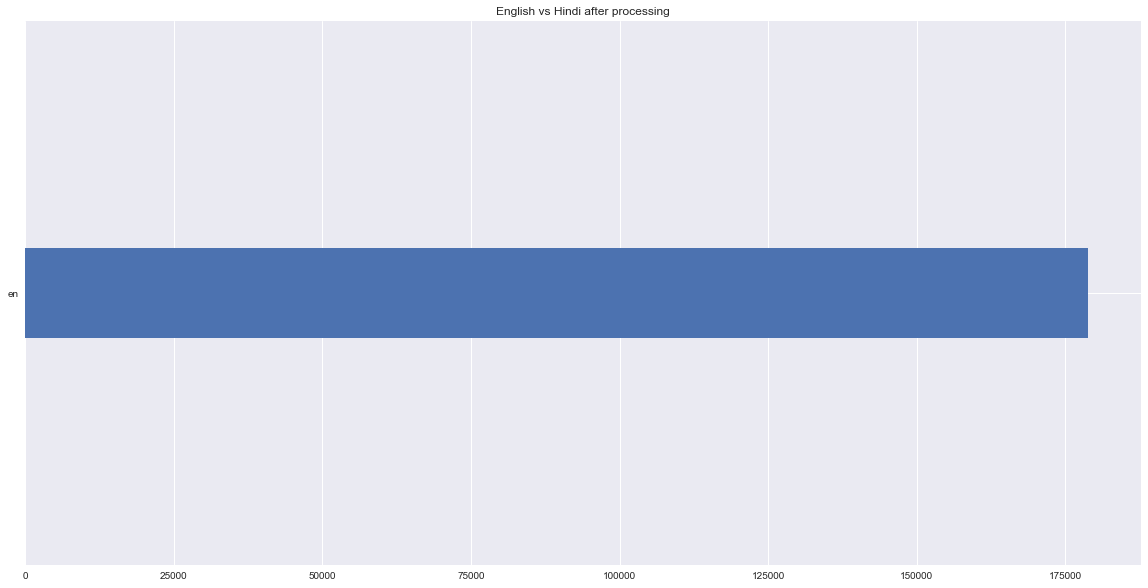

en    178832
dtype: int64


In [252]:
pd.Series(l).value_counts().plot(title='English vs Hindi after processing', kind='barh', width=0.1)
plt.show()
print(pd.Series(l).value_counts())

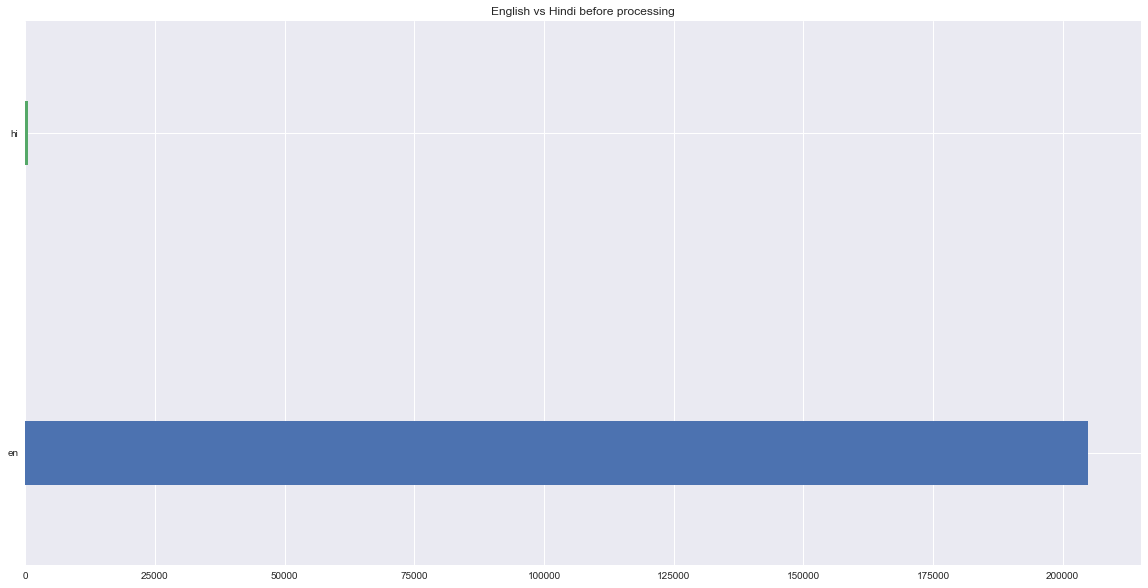

en    204913
hi       483
dtype: int64


In [249]:
pd.Series(l1).value_counts().plot(title='English vs Hindi before processing', kind='barh',width=0.2)
plt.show()
print(pd.Series(l1).value_counts())